# Hacker Earth
## Predict the criminal

There has been a surge in crimes committed in recent years, making crime a top cause of concern for law enforcement. If we can estimate whether someone is going to commit a crime in the future, we can take precautions and be prepared. You are given a dataset containing answers to various questions concerning the professional and private lives of several people. A few of them have been arrested for various small and large crimes in the past. Use the given data to predict if the people in the test data will commit a crime. The train data consists of 45718 rows, while the test data consists of 11430 rows.

Link: https://www.hackerearth.com/challenge/competitive/predict-the-criminal/machine-learning/predict-the-criminal/



### Importing required libraries

In [3]:
import pandas as pd #For reading the dataset and performing data munging 
import numpy as np # For performing cretain airthmetic operations
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For plotting different graphs and plots

### Reading the Train and Test data

+ **We are going to combine the train and test data and after preprocessing we will split them.**

In [5]:
import os

os.chdir("D:/Data Science_Competitions/Hacker_Earth/")

DF1 = pd.read_csv("criminal_train.csv",na_values=-1)
Test= pd.read_csv("criminal_test.csv",na_values=-1)

Test['Criminal']=3

frames = [DF1,Test]


DF= pd.concat(frames)


print("Number of rows in Dataset is ",DF.shape[0])
print("Number of columns in Dataset is ",DF.shape[1])

DF.dtypes

Number of rows in Dataset is  57148
Number of columns in Dataset is  72


PERID          int64
IFATHER      float64
NRCH17_2     float64
IRHHSIZ2     float64
IIHHSIZ2     float64
IRKI17_2     float64
IIKI17_2     float64
IRHH65_2     float64
IIHH65_2     float64
PRXRETRY     float64
PRXYDATA     float64
MEDICARE     float64
CAIDCHIP     float64
CHAMPUS      float64
PRVHLTIN     float64
GRPHLTIN     float64
HLTINNOS     float64
HLCNOTYR     float64
HLCNOTMO     float64
HLCLAST      float64
HLLOSRSN     float64
HLNVCOST     float64
HLNVOFFR     float64
HLNVREF      float64
HLNVNEED     float64
HLNVSOR      float64
IRMCDCHP     float64
IIMCDCHP     float64
IRMEDICR     float64
IIMEDICR     float64
              ...   
CELLNOTCL    float64
CELLWRKNG    float64
IRFAMSOC     float64
IIFAMSOC     float64
IRFAMSSI     float64
IIFAMSSI     float64
IRFSTAMP     float64
IIFSTAMP     float64
IRFAMPMT     float64
IIFAMPMT     float64
IRFAMSVC     float64
IIFAMSVC     float64
IRWELMOS     float64
IIWELMOS     float64
IRPINC3      float64
IRFAMIN3     float64
IIPINC3      

**As mentioned in the competition page all the variables are categorical we can see that most of variables have been numerically coded and are anonymized.**

## Preprocessing

### Checking the null values in the data set

In [6]:

print(DF.isnull().sum())


PERID          0
IFATHER        2
NRCH17_2      92
IRHHSIZ2       2
IIHHSIZ2       2
IRKI17_2       2
IIKI17_2       2
IRHH65_2       2
IIHH65_2       2
PRXRETRY       2
PRXYDATA       2
MEDICARE       2
CAIDCHIP       2
CHAMPUS        2
PRVHLTIN       2
GRPHLTIN       2
HLTINNOS       2
HLCNOTYR       2
HLCNOTMO       2
HLCLAST        2
HLLOSRSN       2
HLNVCOST       2
HLNVOFFR       2
HLNVREF        2
HLNVNEED       2
HLNVSOR        2
IRMCDCHP       2
IIMCDCHP       2
IRMEDICR       2
IIMEDICR       2
            ... 
CELLNOTCL      2
CELLWRKNG      2
IRFAMSOC       2
IIFAMSOC       2
IRFAMSSI       2
IIFAMSSI       2
IRFSTAMP       2
IIFSTAMP       2
IRFAMPMT       2
IIFAMPMT       2
IRFAMSVC       2
IIFAMSVC       2
IRWELMOS       2
IIWELMOS       2
IRPINC3        2
IRFAMIN3       2
IIPINC3        2
IIFAMIN3       2
GOVTPROG       2
POVERTY3     419
TOOLONG        2
TROUBUND       2
PDEN10         2
COUTYP2        2
MAIIN102       2
AIIND102       2
ANALWT_C       2
VESTR         

### Printing the unique categories in the data set

In [7]:
for k, v in DF.nunique().to_dict().items():
    print('{}={}'.format(k,v))

PERID=57148
IFATHER=4
NRCH17_2=4
IRHHSIZ2=6
IIHHSIZ2=2
IRKI17_2=4
IIKI17_2=2
IRHH65_2=3
IIHH65_2=3
PRXRETRY=5
PRXYDATA=6
MEDICARE=6
CAIDCHIP=6
CHAMPUS=6
PRVHLTIN=6
GRPHLTIN=7
HLTINNOS=6
HLCNOTYR=7
HLCNOTMO=17
HLCLAST=9
HLLOSRSN=17
HLNVCOST=6
HLNVOFFR=6
HLNVREF=6
HLNVNEED=6
HLNVSOR=6
IRMCDCHP=2
IIMCDCHP=2
IRMEDICR=2
IIMEDICR=2
IRCHMPUS=2
IICHMPUS=2
IRPRVHLT=2
IIPRVHLT=2
IROTHHLT=3
IIOTHHLT=3
HLCALLFG=2
HLCALL99=2
ANYHLTI2=5
IRINSUR4=2
IIINSUR4=2
OTHINS=2
CELLNOTCL=6
CELLWRKNG=6
IRFAMSOC=2
IIFAMSOC=2
IRFAMSSI=2
IIFAMSSI=2
IRFSTAMP=2
IIFSTAMP=2
IRFAMPMT=2
IIFAMPMT=2
IRFAMSVC=2
IIFAMSVC=2
IRWELMOS=13
IIWELMOS=3
IRPINC3=7
IRFAMIN3=7
IIPINC3=2
IIFAMIN3=2
GOVTPROG=2
POVERTY3=3
TOOLONG=3
TROUBUND=3
PDEN10=3
COUTYP2=3
MAIIN102=2
AIIND102=2
ANALWT_C=57047
VESTR=50
VEREP=2
Criminal=3


+ **From the above output we can see that ANALWT_C contains 57047 unique classes, hence we can ignore this variable since having a categorical variable with so many classes will result in non-significant results.**


+ **Since All the variables are categorical as mentioned on the competition discussion page. We will convert all of the variables into categories.**

In [8]:
DF=DF.drop(['ANALWT_C'],axis=1)

col_names = list(DF.drop(['PERID','Criminal'],axis=1))


for col in col_names:
    DF[col] = DF[col].astype('category',copy=False)



### Imputing the missing values in the varaibles with the mode of the variables.

In [9]:
DF[col_names]=DF[col_names].fillna(DF.mode().iloc[0])

### Checking the distribution of each class in all the variables.

In [10]:

for col in col_names:
    print(DF[col].value_counts()*100/DF.shape[0])



4.0    76.228389
1.0    17.094212
2.0     6.652901
3.0     0.024498
Name: IFATHER, dtype: float64
0.0    73.325401
1.0    11.099251
2.0     9.989851
3.0     5.585497
Name: NRCH17_2, dtype: float64
4.0    23.969343
2.0    22.469728
3.0    22.203752
5.0    13.405544
6.0    10.070344
1.0     7.881291
Name: IRHHSIZ2, dtype: float64
1.0    99.923007
3.0     0.076993
Name: IIHHSIZ2, dtype: float64
1.0    41.945475
2.0    22.397984
3.0    20.781130
4.0    14.875411
Name: IRKI17_2, dtype: float64
1.0    99.641282
3.0     0.358718
Name: IIKI17_2, dtype: float64
1.0    87.992581
2.0     7.830545
3.0     4.176874
Name: IRHH65_2, dtype: float64
1.0    99.417302
3.0     0.502205
2.0     0.080493
Name: IIHH65_2, dtype: float64
99.0    98.132918
2.0      1.660601
98.0     0.117239
94.0     0.080493
97.0     0.008749
Name: PRXRETRY, dtype: float64
99.0    71.027857
1.0     28.685168
98.0     0.117239
2.0      0.083992
94.0     0.080493
97.0     0.005250
Name: PRXYDATA, dtype: float64
2.0     91.299783

+ **Since some of the variables have almost 99% of one class, using such variables in the model will not result in any significant results. Hence we will remove these variables.**

+ **For the rest variables we will try to keep atleast 5% rows for every class, otherwise we will merge the classes so as to increase the predictive power.**

+ **Since the classes are anonymized we will take decision based on the percetage and not of domain knowledge.**

In [11]:
DF['IFATHER']=DF['IFATHER'].replace([3, 2], '999')
DF['NRCH17_2']=DF['NRCH17_2'].replace([3, 2], '999')
DF['IRHH65_2']=DF['IRHH65_2'].replace([3, 2], '999')
DF['PRXYDATA']=DF['PRXYDATA'].replace([94,98,97,2,1], '999')
DF['MEDICARE']=DF['MEDICARE'].replace([94,98,97,85,1], '999')
DF['CAIDCHIP']=DF['CAIDCHIP'].replace([94,98,97,85,1], '999')
DF['CHAMPUS']=DF['CHAMPUS'].replace([94,98,97,85,1], '999')
DF['PRVHLTIN']=DF['PRVHLTIN'].replace([94,98,97,85], '999')
DF['GRPHLTIN']=DF['GRPHLTIN'].replace([94,98,97,85], '999')
DF['HLTINNOS']=DF['HLTINNOS'].replace([94,98,97,85], '999')
DF['HLCNOTYR']=DF['HLCNOTYR'].replace([94,98,97,85], '999')
DF['HLCNOTMO']=DF['HLCNOTMO'].replace([1,2,2.0,98,3,6,4,5,8,12,11,9,10,7,97,94,85], '999')
DF['HLCLAST']=DF['HLCLAST'].replace([4,3,5,1,98,97,94], '999')
DF['HLLOSRSN']=DF['HLLOSRSN'].replace([4,1,5,98,3,2,6,12,10,11,7,97,9,8,94,85], '999')
DF['IIOTHHLT']=DF['IIOTHHLT'].replace([3,1], '999')
DF['HLCALL99']=DF['HLCALL99'].replace([98,97,94], '999')
DF['CELLNOTCL']=DF['CELLNOTCL'].replace([94,98,97,85], '999')
DF['CELLWRKNG']=DF['CELLWRKNG'].replace([94,98,97,85,2], '999')
DF['IRWELMOS']=DF['IRWELMOS'].replace([12,1,6,2,3,4,5,8,9,7,10,11], '999')
DF['IIWELMOS']=DF['IIWELMOS'].replace([1,3], '999')
DF['TOOLONG']=DF['TOOLONG'].replace([1,98], '999')
DF['TROUBUND']=DF['TROUBUND'].replace([1,98], '999')
DF['HLNVCOST']=DF['HLNVCOST'].replace([6,1,98,97,94],'999')
DF['ANYHLTI2']=DF['ANYHLTI2'].replace([98,97,94], '999')



In [12]:
DF=DF.drop(['IIHHSIZ2'],axis=1)
DF=DF.drop(['IIKI17_2'],axis=1)
DF=DF.drop(['IIHH65_2'],axis=1)
DF=DF.drop(['PRXRETRY'],axis=1)
DF=DF.drop(['HLNVOFFR'],axis=1)
DF=DF.drop(['HLNVREF'],axis=1)
DF=DF.drop(['HLNVNEED'],axis=1)
DF=DF.drop(['HLNVSOR'],axis=1)
DF=DF.drop(['IIMCDCHP'],axis=1)
DF=DF.drop(['IIMEDICR'],axis=1)
DF=DF.drop(['IICHMPUS'],axis=1)
DF=DF.drop(['IIPRVHLT'],axis=1)
DF=DF.drop(['HLCALLFG'],axis=1)
DF=DF.drop(['IRINSUR4'],axis=1)
DF=DF.drop(['IIFAMSOC'],axis=1)
DF=DF.drop(['IIFAMSSI'],axis=1)
DF=DF.drop(['IIFSTAMP'],axis=1)
DF=DF.drop(['IRFAMPMT'],axis=1)
DF=DF.drop(['IRFAMSVC'],axis=1)
DF=DF.drop(['IIFAMSVC'],axis=1)
DF=DF.drop(['IIPINC3'],axis=1)
DF=DF.drop(['MAIIN102'],axis=1)
DF=DF.drop(['AIIND102'],axis=1)
DF=DF.drop(['IIINSUR4'],axis=1)
DF=DF.drop(['CELLWRKNG'],axis=1)
DF=DF.drop(['IIFAMPMT'],axis=1)


**After dropping the required variables and merging some classes we will now again check the distribution of the classes.**

In [13]:
col_names1 = list(DF.drop(['PERID','Criminal'],axis=1))


for col in col_names1:
    print(DF[col].value_counts()*100/DF.shape[0])


4.0      76.228389
1.0      17.094212
999.0     6.677399
Name: IFATHER, dtype: float64
0.0      73.325401
999.0    15.575348
1.0      11.099251
Name: NRCH17_2, dtype: float64
4.0    23.969343
2.0    22.469728
3.0    22.203752
5.0    13.405544
6.0    10.070344
1.0     7.881291
Name: IRHHSIZ2, dtype: float64
1.0    41.945475
2.0    22.397984
3.0    20.781130
4.0    14.875411
Name: IRKI17_2, dtype: float64
1.0      87.992581
999.0    12.007419
Name: IRHH65_2, dtype: float64
99.0     71.027857
999.0    28.972143
Name: PRXYDATA, dtype: float64
2.0      91.299783
999.0     8.700217
Name: MEDICARE, dtype: float64
2.0      76.574858
999.0    23.425142
Name: CAIDCHIP, dtype: float64
2.0      95.924617
999.0     4.075383
Name: CHAMPUS, dtype: float64
1.0      60.852523
2.0      38.458039
999.0     0.689438
Name: PRVHLTIN, dtype: float64
1.0      53.755162
99.0     38.458039
2.0       6.945125
999.0     0.841674
Name: GRPHLTIN, dtype: float64
99.0     86.587457
2.0      10.178834
1.0       3.1199

In [14]:
col_names1 = list(DF.drop(['PERID','Criminal'],axis=1))


for col in col_names1:
    DF[col] = DF[col].astype('category',copy=False)

In [15]:
DF.Criminal.value_counts()*100/DF.shape[0]

0    74.44355
3    20.00070
1     5.55575
Name: Criminal, dtype: float64

**We can see that this is highly imbalanced data set.**

### Splitting the test and train dataset

In [16]:
Test_Data= DF[DF['Criminal']==3]

DF_1= DF[DF['Criminal']!=3]



### Splitting the Train data set into validation and train set.

In [17]:
from sklearn.model_selection import train_test_split




variables1 = list(DF_1.drop(['Criminal','PERID'],axis=1))

X= DF_1[variables1]
y= DF_1["Criminal"]

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_Test= Test_Data[variables1]


## Model

### Fitting the random forest model

**Using the functionality of Pyspark made the paramter tunning time by almost half.**

In [23]:
%%time

from sklearn.ensemble import RandomForestClassifier
from spark_sklearn import GridSearchCV
from pyspark import SparkContext, SparkConf
from sklearn.ensemble import RandomForestClassifier


sc = SparkContext.getOrCreate()

param_grid = [
  {'n_estimators': [5500],'criterion': ['entropy'],'max_features': ["auto"]
   , 'min_samples_leaf': [3],'min_samples_split': [10],'class_weight': [{0: 1, 1: 3}] 
  }
 ]


RFC_UN = RandomForestClassifier(random_state=11,n_jobs=-1,oob_score = True)

RFC_UN = GridSearchCV(sc,estimator=RFC_UN,param_grid=param_grid,scoring="roc_auc",cv=5)

RF_UN= RFC_UN.fit(X_train,y_train)


print("Tuned Best Parameters for UnBalanced dataset is {}".format(RFC_UN.best_estimator_))

Tuned Best Parameters for UnBalanced dataset is RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 3},
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=5500, n_jobs=-1, oob_score=True, random_state=11,
            verbose=0, warm_start=False)
Wall time: 4min 34s


### Checking the results of Gridsearch 

+ **After checking various combinations of parameters above are the best parametres.**

In [24]:
if 1==0 :
 
 RF_results=pd.DataFrame(RF_UN.cv_results_)
 
 RF_results.to_csv('RF_Gridsearch_Results_31March_2.csv',index=False)

### Checking the Matthews_correlation score at every 10% interval.

In [ ]:
RF_prediction_UN=RFC_UN.predict_proba(X_validation)[:, 1]


In [32]:
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt


threshold= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

correct=y_validation

matthews_corrcoef_values= []


for i in threshold:
    RF_class= np.where(RF_prediction_UN>= i,1,0)
    score= matthews_corrcoef(np.array(correct),RF_class)
    print("The Mathews corr of Random forest model with Threshold",i,"is", score)
    matthews_corrcoef_values.append(score)


The Mathews corr of Random forest model with Threshold 0.1 is 0.5185406339318382
The Mathews corr of Random forest model with Threshold 0.2 is 0.596648135014285
The Mathews corr of Random forest model with Threshold 0.3 is 0.632647823728835
The Mathews corr of Random forest model with Threshold 0.4 is 0.6514700112082517
The Mathews corr of Random forest model with Threshold 0.5 is 0.6448492355201934
The Mathews corr of Random forest model with Threshold 0.6 is 0.6100887455145381
The Mathews corr of Random forest model with Threshold 0.7 is 0.5926305980903795
The Mathews corr of Random forest model with Threshold 0.8 is 0.4453066548867436
The Mathews corr of Random forest model with Threshold 0.9 is 0.10298653519751896


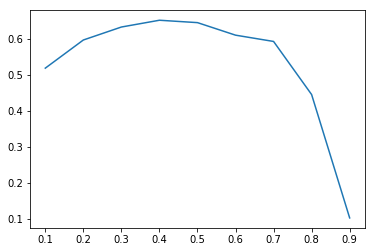

In [26]:
%matplotlib inline
plt.plot(threshold,matthews_corrcoef_values)


### Predicting the Test data with threshold taken from the above graph.

In [31]:
RF_Test_Prediction= RFC_UN.predict_proba(X_Test)[:, 1]

RF_Test_class= np.where(RF_Test_Prediction>= 0.39,1,0)

RF_Test_class_df= pd.DataFrame(RF_Test_class)

RF_Test_class_df.columns=['Criminal']

RF_Test= pd.concat([Test_Data["PERID"],RF_Test_class_df],axis=1)


RF_Test.to_csv('D:/Data Science_Competitions/Hacker_Earth/Solution_RF_17June_0.40.csv',index=False)



### Regualarized random forest Model

In [34]:
from rgf.sklearn import FastRGFClassifier
from sklearn.model_selection import GridSearchCV

parameters_fast = {'max_leaf':[1000],
              'loss': ['LOGISTIC'],'l1':[10.0],'l2':[1500.0],   
        'min_samples_leaf':[3],'n_estimators': [1000],'opt_algorithm':["rgf"]}


rgf = FastRGFClassifier(n_jobs=-1)

rgf = GridSearchCV(estimator=rgf,param_grid=parameters_fast,cv=5)

rgf= rgf.fit(X_train,y_train)


In [35]:
if 1==0 :
  pd.DataFrame(rgf.cv_results_).to_csv('FastRF_Gridsearch_Results_Category.csv',index=False)

In [ ]:
FastRGF_Pred=rgf.predict_proba(X_validation)[:,1]

In [36]:
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt


threshold= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

correct=y_validation

matthews_corrcoef_values= []

 
for i in threshold:
    FastRGF_class= np.where(FastRGF_Pred>= i,1,0)
    score= matthews_corrcoef(np.array(correct),FastRGF_class)
    print("The Mathews corr of Regularized Random forest model with Threshold",i,"is", score)
    matthews_corrcoef_values.append(score)

The Mathews corr of Regularized Random forest model with Threshold 0.1 is 0.5997336412968536
The Mathews corr of Regularized Random forest model with Threshold 0.2 is 0.6459368003163464
The Mathews corr of Regularized Random forest model with Threshold 0.3 is 0.6500477482381329
The Mathews corr of Regularized Random forest model with Threshold 0.4 is 0.6262634224990639
The Mathews corr of Regularized Random forest model with Threshold 0.5 is 0.6083996876461688
The Mathews corr of Regularized Random forest model with Threshold 0.6 is 0.5828383917896188
The Mathews corr of Regularized Random forest model with Threshold 0.7 is 0.4498478534311736
The Mathews corr of Regularized Random forest model with Threshold 0.8 is 0.1781852717467127
The Mathews corr of Regularized Random forest model with Threshold 0.9 is 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [37]:
RGF_Test_Prediction= rgf.predict_proba(X_Test)[:, 1]

RGF_Test_class= np.where(RGF_Test_Prediction>= 0.28,1,0)

RGF_Test_class_df= pd.DataFrame(RGF_Test_class)

RGF_Test_class_df.columns=['Criminal']

RGF_Test= pd.concat([Test_Data["PERID"],RGF_Test_class_df],axis=1)



RGF_Test.to_csv('D:/Data Science_Competitions/Hacker_Earth/Solution_RGF_6Jun_0.28.csv',index=False)



### CatBoost Model

In [38]:
from catboost import Pool, CatBoostClassifier, cv, CatboostIpythonWidget

categorical_features_indices=np.where(X_train.dtypes != np.float)[0]


valid_set= [X_validation,y_validation]



Cat = CatBoostClassifier(loss_function='CrossEntropy',eval_metric="MCC",iterations=5000,depth=10,random_seed=11
                         ,one_hot_max_size=31) 

Cat_UnBal=Cat.fit(X_train,y_train,eval_set= valid_set
                  , use_best_model=True,cat_features=categorical_features_indices)


correct = y_validation



0:	learn: 0.4690846	test: 0.4517910	best: 0.4517910 (0)	total: 720ms	remaining: 59m 59s
1:	learn: 0.4532873	test: 0.4643763	best: 0.4643763 (1)	total: 1.17s	remaining: 48m 50s
2:	learn: 0.2693466	test: 0.2653566	best: 0.4643763 (1)	total: 1.31s	remaining: 36m 16s
3:	learn: 0.3891295	test: 0.3748464	best: 0.4643763 (1)	total: 1.59s	remaining: 33m 12s
4:	learn: 0.2158377	test: 0.1991453	best: 0.4643763 (1)	total: 1.67s	remaining: 27m 46s
5:	learn: 0.2608023	test: 0.2444204	best: 0.4643763 (1)	total: 2.01s	remaining: 27m 55s
6:	learn: 0.3031454	test: 0.2791848	best: 0.4643763 (1)	total: 2.3s	remaining: 27m 20s
7:	learn: 0.3858001	test: 0.3768329	best: 0.4643763 (1)	total: 2.63s	remaining: 27m 22s
8:	learn: 0.4628600	test: 0.4426668	best: 0.4643763 (1)	total: 2.97s	remaining: 27m 27s
9:	learn: 0.4944903	test: 0.4885550	best: 0.4885550 (9)	total: 3.29s	remaining: 27m 22s
10:	learn: 0.4160728	test: 0.3984235	best: 0.4885550 (9)	total: 3.33s	remaining: 25m 9s
11:	learn: 0.4851206	test: 0.4734

92:	learn: 0.6147622	test: 0.5991004	best: 0.5998450 (88)	total: 25.2s	remaining: 22m 7s
93:	learn: 0.6147622	test: 0.5991004	best: 0.5998450 (88)	total: 25.3s	remaining: 21m 58s
94:	learn: 0.6147622	test: 0.5991004	best: 0.5998450 (88)	total: 25.4s	remaining: 21m 49s
95:	learn: 0.6153472	test: 0.5991004	best: 0.5998450 (88)	total: 25.7s	remaining: 21m 51s
96:	learn: 0.6153472	test: 0.5991004	best: 0.5998450 (88)	total: 25.8s	remaining: 21m 42s
97:	learn: 0.6156396	test: 0.5991004	best: 0.5998450 (88)	total: 25.9s	remaining: 21m 35s
98:	learn: 0.6154652	test: 0.6003420	best: 0.6003420 (98)	total: 26.2s	remaining: 21m 37s
99:	learn: 0.6157575	test: 0.6003420	best: 0.6003420 (99)	total: 26.4s	remaining: 21m 32s
100:	learn: 0.6159318	test: 0.6003420	best: 0.6003420 (100)	total: 26.7s	remaining: 21m 35s
101:	learn: 0.6159318	test: 0.6003420	best: 0.6003420 (101)	total: 26.8s	remaining: 21m 24s
102:	learn: 0.6165730	test: 0.6003420	best: 0.6003420 (102)	total: 27.1s	remaining: 21m 27s
103:	

182:	learn: 0.6349635	test: 0.6008400	best: 0.6015818 (132)	total: 49s	remaining: 21m 31s
183:	learn: 0.6351397	test: 0.6008400	best: 0.6015818 (132)	total: 49.4s	remaining: 21m 32s
184:	learn: 0.6350289	test: 0.6008400	best: 0.6015818 (132)	total: 49.6s	remaining: 21m 31s
185:	learn: 0.6361768	test: 0.6020783	best: 0.6020783 (185)	total: 50s	remaining: 21m 34s
186:	learn: 0.6365297	test: 0.6020783	best: 0.6020783 (186)	total: 50.3s	remaining: 21m 35s
187:	learn: 0.6376332	test: 0.6020783	best: 0.6020783 (187)	total: 50.7s	remaining: 21m 37s
188:	learn: 0.6374563	test: 0.6020783	best: 0.6020783 (188)	total: 50.9s	remaining: 21m 34s
189:	learn: 0.6374563	test: 0.6013390	best: 0.6020783 (188)	total: 51.2s	remaining: 21m 37s
190:	learn: 0.6386693	test: 0.6020783	best: 0.6020783 (190)	total: 51.6s	remaining: 21m 38s
191:	learn: 0.6386018	test: 0.6013390	best: 0.6020783 (190)	total: 51.9s	remaining: 21m 40s
192:	learn: 0.6383156	test: 0.6020783	best: 0.6020783 (192)	total: 52.1s	remaining: 

272:	learn: 0.6569829	test: 0.6119232	best: 0.6136308 (252)	total: 1m 14s	remaining: 21m 35s
273:	learn: 0.6569829	test: 0.6119232	best: 0.6136308 (252)	total: 1m 15s	remaining: 21m 35s
274:	learn: 0.6580079	test: 0.6104510	best: 0.6136308 (252)	total: 1m 15s	remaining: 21m 36s
275:	learn: 0.6582894	test: 0.6104510	best: 0.6136308 (252)	total: 1m 15s	remaining: 21m 37s
276:	learn: 0.6582894	test: 0.6104510	best: 0.6136308 (252)	total: 1m 15s	remaining: 21m 34s
277:	learn: 0.6581094	test: 0.6116745	best: 0.6136308 (252)	total: 1m 16s	remaining: 21m 35s
278:	learn: 0.6581094	test: 0.6099610	best: 0.6136308 (252)	total: 1m 16s	remaining: 21m 36s
279:	learn: 0.6583908	test: 0.6099610	best: 0.6136308 (252)	total: 1m 16s	remaining: 21m 37s
280:	learn: 0.6583908	test: 0.6099610	best: 0.6136308 (252)	total: 1m 17s	remaining: 21m 40s
281:	learn: 0.6587508	test: 0.6111860	best: 0.6136308 (252)	total: 1m 17s	remaining: 21m 41s
282:	learn: 0.6587508	test: 0.6111860	best: 0.6136308 (252)	total: 1m 

361:	learn: 0.6821010	test: 0.6245512	best: 0.6264904 (358)	total: 1m 45s	remaining: 22m 34s
362:	learn: 0.6829270	test: 0.6257565	best: 0.6264904 (358)	total: 1m 46s	remaining: 22m 35s
363:	learn: 0.6834773	test: 0.6264904	best: 0.6264904 (363)	total: 1m 46s	remaining: 22m 36s
364:	learn: 0.6838420	test: 0.6250247	best: 0.6264904 (363)	total: 1m 46s	remaining: 22m 37s
365:	learn: 0.6843918	test: 0.6238191	best: 0.6264904 (363)	total: 1m 47s	remaining: 22m 37s
366:	learn: 0.6846667	test: 0.6238191	best: 0.6264904 (363)	total: 1m 47s	remaining: 22m 38s
367:	learn: 0.6848491	test: 0.6238191	best: 0.6264904 (363)	total: 1m 48s	remaining: 22m 40s
368:	learn: 0.6848491	test: 0.6238191	best: 0.6264904 (363)	total: 1m 48s	remaining: 22m 41s
369:	learn: 0.6856719	test: 0.6238191	best: 0.6264904 (363)	total: 1m 48s	remaining: 22m 41s
370:	learn: 0.6864038	test: 0.6238191	best: 0.6264904 (363)	total: 1m 49s	remaining: 22m 42s
371:	learn: 0.6859464	test: 0.6238191	best: 0.6264904 (363)	total: 1m 

450:	learn: 0.7059464	test: 0.6221186	best: 0.6279030 (435)	total: 2m 20s	remaining: 23m 34s
451:	learn: 0.7064863	test: 0.6221186	best: 0.6279030 (435)	total: 2m 20s	remaining: 23m 35s
452:	learn: 0.7079382	test: 0.6221186	best: 0.6279030 (435)	total: 2m 21s	remaining: 23m 35s
453:	learn: 0.7087464	test: 0.6233236	best: 0.6279030 (435)	total: 2m 21s	remaining: 23m 35s
454:	learn: 0.7083943	test: 0.6233236	best: 0.6279030 (435)	total: 2m 21s	remaining: 23m 36s
455:	learn: 0.7082292	test: 0.6240467	best: 0.6279030 (435)	total: 2m 22s	remaining: 23m 37s
456:	learn: 0.7084771	test: 0.6240467	best: 0.6279030 (435)	total: 2m 22s	remaining: 23m 38s
457:	learn: 0.7086637	test: 0.6228419	best: 0.6279030 (435)	total: 2m 23s	remaining: 23m 38s
458:	learn: 0.7086637	test: 0.6247719	best: 0.6279030 (435)	total: 2m 23s	remaining: 23m 39s
459:	learn: 0.7095539	test: 0.6247719	best: 0.6279030 (435)	total: 2m 23s	remaining: 23m 40s
460:	learn: 0.7110257	test: 0.6240467	best: 0.6279030 (435)	total: 2m 

539:	learn: 0.7360045	test: 0.6192458	best: 0.6286318 (504)	total: 2m 57s	remaining: 24m 28s
540:	learn: 0.7364575	test: 0.6187536	best: 0.6286318 (504)	total: 2m 58s	remaining: 24m 29s
541:	learn: 0.7366477	test: 0.6194710	best: 0.6286318 (504)	total: 2m 58s	remaining: 24m 30s
542:	learn: 0.7361946	test: 0.6206781	best: 0.6286318 (504)	total: 2m 59s	remaining: 24m 30s
543:	learn: 0.7361946	test: 0.6206781	best: 0.6286318 (504)	total: 2m 59s	remaining: 24m 31s
544:	learn: 0.7361946	test: 0.6206781	best: 0.6286318 (504)	total: 3m	remaining: 24m 32s
545:	learn: 0.7364575	test: 0.6206781	best: 0.6286318 (504)	total: 3m	remaining: 24m 32s
546:	learn: 0.7364575	test: 0.6206781	best: 0.6286318 (504)	total: 3m	remaining: 24m 33s
547:	learn: 0.7367204	test: 0.6206781	best: 0.6286318 (504)	total: 3m 1s	remaining: 24m 34s
548:	learn: 0.7362675	test: 0.6199609	best: 0.6286318 (504)	total: 3m 1s	remaining: 24m 35s
549:	learn: 0.7369105	test: 0.6192458	best: 0.6286318 (504)	total: 3m 2s	remaining: 

628:	learn: 0.7570357	test: 0.6205197	best: 0.6286318 (504)	total: 3m 38s	remaining: 25m 15s
629:	learn: 0.7566479	test: 0.6205197	best: 0.6286318 (504)	total: 3m 38s	remaining: 25m 15s
630:	learn: 0.7575523	test: 0.6205197	best: 0.6286318 (504)	total: 3m 39s	remaining: 25m 16s
631:	learn: 0.7577464	test: 0.6198175	best: 0.6286318 (504)	total: 3m 39s	remaining: 25m 16s
632:	learn: 0.7581348	test: 0.6224244	best: 0.6286318 (504)	total: 3m 39s	remaining: 25m 17s
633:	learn: 0.7581348	test: 0.6217205	best: 0.6286318 (504)	total: 3m 40s	remaining: 25m 17s
634:	learn: 0.7590399	test: 0.6198175	best: 0.6286318 (504)	total: 3m 40s	remaining: 25m 17s
635:	learn: 0.7592978	test: 0.6191173	best: 0.6286318 (504)	total: 3m 41s	remaining: 25m 18s
636:	learn: 0.7611702	test: 0.6191173	best: 0.6286318 (504)	total: 3m 41s	remaining: 25m 18s
637:	learn: 0.7613650	test: 0.6203186	best: 0.6286318 (504)	total: 3m 42s	remaining: 25m 18s
638:	learn: 0.7613025	test: 0.6203186	best: 0.6286318 (504)	total: 3m 

717:	learn: 0.7787872	test: 0.6104803	best: 0.6286318 (504)	total: 4m 20s	remaining: 25m 50s
718:	learn: 0.7798392	test: 0.6104803	best: 0.6286318 (504)	total: 4m 20s	remaining: 25m 50s
719:	learn: 0.7794940	test: 0.6104803	best: 0.6286318 (504)	total: 4m 20s	remaining: 25m 51s
720:	learn: 0.7794940	test: 0.6116913	best: 0.6286318 (504)	total: 4m 21s	remaining: 25m 51s
721:	learn: 0.7800011	test: 0.6123885	best: 0.6286318 (504)	total: 4m 21s	remaining: 25m 51s
722:	learn: 0.7803462	test: 0.6116913	best: 0.6286318 (504)	total: 4m 22s	remaining: 25m 51s
723:	learn: 0.7803462	test: 0.6123885	best: 0.6286318 (504)	total: 4m 22s	remaining: 25m 51s
724:	learn: 0.7800927	test: 0.6123885	best: 0.6286318 (504)	total: 4m 23s	remaining: 25m 51s
725:	learn: 0.7802391	test: 0.6123885	best: 0.6286318 (504)	total: 4m 23s	remaining: 25m 51s
726:	learn: 0.7802391	test: 0.6118771	best: 0.6286318 (504)	total: 4m 23s	remaining: 25m 51s
727:	learn: 0.7802391	test: 0.6142968	best: 0.6286318 (504)	total: 4m 

806:	learn: 0.7950880	test: 0.6085720	best: 0.6286318 (504)	total: 5m 1s	remaining: 26m 6s
807:	learn: 0.7957904	test: 0.6085720	best: 0.6286318 (504)	total: 5m 1s	remaining: 26m 6s
808:	learn: 0.7957904	test: 0.6085720	best: 0.6286318 (504)	total: 5m 2s	remaining: 26m 6s
809:	learn: 0.7955883	test: 0.6085720	best: 0.6286318 (504)	total: 5m 2s	remaining: 26m 6s
810:	learn: 0.7957904	test: 0.6085720	best: 0.6286318 (504)	total: 5m 3s	remaining: 26m 6s
811:	learn: 0.7956366	test: 0.6097848	best: 0.6286318 (504)	total: 5m 3s	remaining: 26m 6s
812:	learn: 0.7958384	test: 0.6097848	best: 0.6286318 (504)	total: 5m 4s	remaining: 26m 6s
813:	learn: 0.7958384	test: 0.6097848	best: 0.6286318 (504)	total: 5m 4s	remaining: 26m 6s
814:	learn: 0.7958384	test: 0.6097848	best: 0.6286318 (504)	total: 5m 5s	remaining: 26m 6s
815:	learn: 0.7962904	test: 0.6097848	best: 0.6286318 (504)	total: 5m 5s	remaining: 26m 7s
816:	learn: 0.7969921	test: 0.6097848	best: 0.6286318 (504)	total: 5m 6s	remaining: 26m 7s

895:	learn: 0.8116187	test: 0.6116913	best: 0.6286318 (504)	total: 5m 47s	remaining: 26m 32s
896:	learn: 0.8117813	test: 0.6116913	best: 0.6286318 (504)	total: 5m 48s	remaining: 26m 32s
897:	learn: 0.8117813	test: 0.6116913	best: 0.6286318 (504)	total: 5m 48s	remaining: 26m 32s
898:	learn: 0.8119862	test: 0.6116913	best: 0.6286318 (504)	total: 5m 49s	remaining: 26m 32s
899:	learn: 0.8121118	test: 0.6135978	best: 0.6286318 (504)	total: 5m 49s	remaining: 26m 32s
900:	learn: 0.8129719	test: 0.6104803	best: 0.6286318 (504)	total: 5m 50s	remaining: 26m 32s
901:	learn: 0.8127256	test: 0.6111777	best: 0.6286318 (504)	total: 5m 50s	remaining: 26m 32s
902:	learn: 0.8145712	test: 0.6111777	best: 0.6286318 (504)	total: 5m 51s	remaining: 26m 32s
903:	learn: 0.8148171	test: 0.6111777	best: 0.6286318 (504)	total: 5m 51s	remaining: 26m 33s
904:	learn: 0.8149814	test: 0.6111777	best: 0.6286318 (504)	total: 5m 52s	remaining: 26m 33s
905:	learn: 0.8151868	test: 0.6111777	best: 0.6286318 (504)	total: 5m 

984:	learn: 0.8319172	test: 0.6080535	best: 0.6286318 (504)	total: 6m 37s	remaining: 26m 59s
985:	learn: 0.8319172	test: 0.6080535	best: 0.6286318 (504)	total: 6m 37s	remaining: 26m 59s
986:	learn: 0.8319172	test: 0.6080535	best: 0.6286318 (504)	total: 6m 38s	remaining: 26m 59s
987:	learn: 0.8316749	test: 0.6080535	best: 0.6286318 (504)	total: 6m 38s	remaining: 26m 59s
988:	learn: 0.8316749	test: 0.6080535	best: 0.6286318 (504)	total: 6m 39s	remaining: 27m
989:	learn: 0.8317085	test: 0.6087513	best: 0.6286318 (504)	total: 6m 40s	remaining: 27m
990:	learn: 0.8319172	test: 0.6094511	best: 0.6286318 (504)	total: 6m 40s	remaining: 27m
991:	learn: 0.8319172	test: 0.6094511	best: 0.6286318 (504)	total: 6m 41s	remaining: 27m
992:	learn: 0.8324017	test: 0.6094511	best: 0.6286318 (504)	total: 6m 41s	remaining: 27m
993:	learn: 0.8326105	test: 0.6094511	best: 0.6286318 (504)	total: 6m 42s	remaining: 27m
994:	learn: 0.8324017	test: 0.6082357	best: 0.6286318 (504)	total: 6m 42s	remaining: 27m
995:	

1073:	learn: 0.8422902	test: 0.6056202	best: 0.6286318 (504)	total: 7m 24s	remaining: 27m 5s
1074:	learn: 0.8422902	test: 0.6056202	best: 0.6286318 (504)	total: 7m 25s	remaining: 27m 5s
1075:	learn: 0.8425302	test: 0.6056202	best: 0.6286318 (504)	total: 7m 25s	remaining: 27m 5s
1076:	learn: 0.8425302	test: 0.6056202	best: 0.6286318 (504)	total: 7m 26s	remaining: 27m 5s
1077:	learn: 0.8427701	test: 0.6063184	best: 0.6286318 (504)	total: 7m 26s	remaining: 27m 5s
1078:	learn: 0.8429496	test: 0.6056202	best: 0.6286318 (504)	total: 7m 27s	remaining: 27m 6s
1079:	learn: 0.8434293	test: 0.6070186	best: 0.6286318 (504)	total: 7m 28s	remaining: 27m 6s
1080:	learn: 0.8434293	test: 0.6070186	best: 0.6286318 (504)	total: 7m 28s	remaining: 27m 6s
1081:	learn: 0.8434293	test: 0.6063184	best: 0.6286318 (504)	total: 7m 29s	remaining: 27m 6s
1082:	learn: 0.8434293	test: 0.6075357	best: 0.6286318 (504)	total: 7m 29s	remaining: 27m 6s
1083:	learn: 0.8436691	test: 0.6075357	best: 0.6286318 (504)	total: 7m

1162:	learn: 0.8540844	test: 0.6004061	best: 0.6286318 (504)	total: 8m 14s	remaining: 27m 12s
1163:	learn: 0.8540844	test: 0.6016275	best: 0.6286318 (504)	total: 8m 15s	remaining: 27m 12s
1164:	learn: 0.8540844	test: 0.6009389	best: 0.6286318 (504)	total: 8m 16s	remaining: 27m 12s
1165:	learn: 0.8545073	test: 0.6009389	best: 0.6286318 (504)	total: 8m 16s	remaining: 27m 13s
1166:	learn: 0.8545073	test: 0.6009389	best: 0.6286318 (504)	total: 8m 17s	remaining: 27m 13s
1167:	learn: 0.8545073	test: 0.6009389	best: 0.6286318 (504)	total: 8m 17s	remaining: 27m 13s
1168:	learn: 0.8545333	test: 0.6002523	best: 0.6286318 (504)	total: 8m 18s	remaining: 27m 13s
1169:	learn: 0.8540844	test: 0.6009389	best: 0.6286318 (504)	total: 8m 18s	remaining: 27m 13s
1170:	learn: 0.8540583	test: 0.6009389	best: 0.6286318 (504)	total: 8m 19s	remaining: 27m 13s
1171:	learn: 0.8540583	test: 0.6009389	best: 0.6286318 (504)	total: 8m 19s	remaining: 27m 12s
1172:	learn: 0.8536092	test: 0.6002523	best: 0.6286318 (504)

1250:	learn: 0.8663565	test: 0.5983458	best: 0.6286318 (504)	total: 9m 1s	remaining: 27m 4s
1251:	learn: 0.8665691	test: 0.5983458	best: 0.6286318 (504)	total: 9m 2s	remaining: 27m 3s
1252:	learn: 0.8668263	test: 0.5983458	best: 0.6286318 (504)	total: 9m 2s	remaining: 27m 3s
1253:	learn: 0.8670611	test: 0.5976629	best: 0.6286318 (504)	total: 9m 3s	remaining: 27m 3s
1254:	learn: 0.8674864	test: 0.5976629	best: 0.6286318 (504)	total: 9m 3s	remaining: 27m 3s
1255:	learn: 0.8672737	test: 0.5976629	best: 0.6286318 (504)	total: 9m 4s	remaining: 27m 2s
1256:	learn: 0.8674864	test: 0.5976629	best: 0.6286318 (504)	total: 9m 4s	remaining: 27m 2s
1257:	learn: 0.8674864	test: 0.5995676	best: 0.6286318 (504)	total: 9m 5s	remaining: 27m 2s
1258:	learn: 0.8674864	test: 0.5995676	best: 0.6286318 (504)	total: 9m 5s	remaining: 27m 2s
1259:	learn: 0.8672516	test: 0.6001052	best: 0.6286318 (504)	total: 9m 6s	remaining: 27m 2s
1260:	learn: 0.8674864	test: 0.5995676	best: 0.6286318 (504)	total: 9m 6s	remain

1338:	learn: 0.8744705	test: 0.6001052	best: 0.6286318 (504)	total: 9m 46s	remaining: 26m 43s
1339:	learn: 0.8742568	test: 0.6001052	best: 0.6286318 (504)	total: 9m 46s	remaining: 26m 42s
1340:	learn: 0.8744901	test: 0.6001052	best: 0.6286318 (504)	total: 9m 47s	remaining: 26m 42s
1341:	learn: 0.8753838	test: 0.6001052	best: 0.6286318 (504)	total: 9m 47s	remaining: 26m 42s
1342:	learn: 0.8753838	test: 0.5994245	best: 0.6286318 (504)	total: 9m 48s	remaining: 26m 42s
1343:	learn: 0.8756168	test: 0.5994245	best: 0.6286318 (504)	total: 9m 48s	remaining: 26m 41s
1344:	learn: 0.8760636	test: 0.5994245	best: 0.6286318 (504)	total: 9m 49s	remaining: 26m 41s
1345:	learn: 0.8760636	test: 0.5994245	best: 0.6286318 (504)	total: 9m 49s	remaining: 26m 41s
1346:	learn: 0.8760636	test: 0.5994245	best: 0.6286318 (504)	total: 9m 50s	remaining: 26m 41s
1347:	learn: 0.8762774	test: 0.5982040	best: 0.6286318 (504)	total: 9m 51s	remaining: 26m 41s
1348:	learn: 0.8760636	test: 0.6001052	best: 0.6286318 (504)

1425:	learn: 0.8853252	test: 0.5968479	best: 0.6286318 (504)	total: 10m 32s	remaining: 26m 25s
1426:	learn: 0.8855562	test: 0.5968479	best: 0.6286318 (504)	total: 10m 33s	remaining: 26m 24s
1427:	learn: 0.8855562	test: 0.5968479	best: 0.6286318 (504)	total: 10m 33s	remaining: 26m 24s
1428:	learn: 0.8855562	test: 0.5968479	best: 0.6286318 (504)	total: 10m 34s	remaining: 26m 24s
1429:	learn: 0.8855562	test: 0.5968479	best: 0.6286318 (504)	total: 10m 34s	remaining: 26m 23s
1430:	learn: 0.8857707	test: 0.5961727	best: 0.6286318 (504)	total: 10m 34s	remaining: 26m 23s
1431:	learn: 0.8860016	test: 0.5961727	best: 0.6286318 (504)	total: 10m 35s	remaining: 26m 22s
1432:	learn: 0.8859853	test: 0.5968479	best: 0.6286318 (504)	total: 10m 35s	remaining: 26m 22s
1433:	learn: 0.8857544	test: 0.5961727	best: 0.6286318 (504)	total: 10m 36s	remaining: 26m 22s
1434:	learn: 0.8857544	test: 0.5961727	best: 0.6286318 (504)	total: 10m 36s	remaining: 26m 21s
1435:	learn: 0.8859853	test: 0.5968479	best: 0.628

1512:	learn: 0.8902259	test: 0.5950789	best: 0.6286318 (504)	total: 11m 14s	remaining: 25m 54s
1513:	learn: 0.8899959	test: 0.5956255	best: 0.6286318 (504)	total: 11m 15s	remaining: 25m 54s
1514:	learn: 0.8902259	test: 0.5956255	best: 0.6286318 (504)	total: 11m 15s	remaining: 25m 54s
1515:	learn: 0.8902259	test: 0.5956255	best: 0.6286318 (504)	total: 11m 16s	remaining: 25m 53s
1516:	learn: 0.8906715	test: 0.5956255	best: 0.6286318 (504)	total: 11m 16s	remaining: 25m 53s
1517:	learn: 0.8906572	test: 0.5956255	best: 0.6286318 (504)	total: 11m 17s	remaining: 25m 53s
1518:	learn: 0.8906572	test: 0.5956255	best: 0.6286318 (504)	total: 11m 17s	remaining: 25m 52s
1519:	learn: 0.8908871	test: 0.5956255	best: 0.6286318 (504)	total: 11m 17s	remaining: 25m 52s
1520:	learn: 0.8908871	test: 0.5956255	best: 0.6286318 (504)	total: 11m 18s	remaining: 25m 51s
1521:	learn: 0.8911029	test: 0.5956255	best: 0.6286318 (504)	total: 11m 18s	remaining: 25m 51s
1522:	learn: 0.8913327	test: 0.5956255	best: 0.628

1599:	learn: 0.8983284	test: 0.5987457	best: 0.6286318 (504)	total: 11m 58s	remaining: 25m 25s
1600:	learn: 0.8983284	test: 0.5987457	best: 0.6286318 (504)	total: 11m 58s	remaining: 25m 25s
1601:	learn: 0.8981000	test: 0.5987457	best: 0.6286318 (504)	total: 11m 59s	remaining: 25m 25s
1602:	learn: 0.8983410	test: 0.5987457	best: 0.6286318 (504)	total: 11m 59s	remaining: 25m 25s
1603:	learn: 0.8983410	test: 0.5987457	best: 0.6286318 (504)	total: 12m	remaining: 25m 24s
1604:	learn: 0.8983410	test: 0.5987457	best: 0.6286318 (504)	total: 12m	remaining: 25m 24s
1605:	learn: 0.8983410	test: 0.5987457	best: 0.6286318 (504)	total: 12m 1s	remaining: 25m 24s
1606:	learn: 0.8983284	test: 0.5987457	best: 0.6286318 (504)	total: 12m 1s	remaining: 25m 23s
1607:	learn: 0.8983284	test: 0.5987457	best: 0.6286318 (504)	total: 12m 2s	remaining: 25m 23s
1608:	learn: 0.8990009	test: 0.5987457	best: 0.6286318 (504)	total: 12m 2s	remaining: 25m 23s
1609:	learn: 0.8990009	test: 0.5987457	best: 0.6286318 (504)	t

1686:	learn: 0.9046110	test: 0.5949502	best: 0.6286318 (504)	total: 12m 41s	remaining: 24m 56s
1687:	learn: 0.9041566	test: 0.5949502	best: 0.6286318 (504)	total: 12m 42s	remaining: 24m 56s
1688:	learn: 0.9039406	test: 0.5949502	best: 0.6286318 (504)	total: 12m 42s	remaining: 24m 55s
1689:	learn: 0.9046110	test: 0.5944015	best: 0.6286318 (504)	total: 12m 43s	remaining: 24m 55s
1690:	learn: 0.9048381	test: 0.5944015	best: 0.6286318 (504)	total: 12m 43s	remaining: 24m 54s
1691:	learn: 0.9050651	test: 0.5944015	best: 0.6286318 (504)	total: 12m 44s	remaining: 24m 54s
1692:	learn: 0.9057350	test: 0.5931759	best: 0.6286318 (504)	total: 12m 44s	remaining: 24m 54s
1693:	learn: 0.9057350	test: 0.5931759	best: 0.6286318 (504)	total: 12m 45s	remaining: 24m 53s
1694:	learn: 0.9059619	test: 0.5925003	best: 0.6286318 (504)	total: 12m 45s	remaining: 24m 53s
1695:	learn: 0.9061887	test: 0.5937261	best: 0.6286318 (504)	total: 12m 46s	remaining: 24m 52s
1696:	learn: 0.9061887	test: 0.5937261	best: 0.628

1773:	learn: 0.9113119	test: 0.5944015	best: 0.6286318 (504)	total: 13m 26s	remaining: 24m 25s
1774:	learn: 0.9113119	test: 0.5944015	best: 0.6286318 (504)	total: 13m 26s	remaining: 24m 25s
1775:	learn: 0.9115282	test: 0.5944015	best: 0.6286318 (504)	total: 13m 27s	remaining: 24m 25s
1776:	learn: 0.9115282	test: 0.5944015	best: 0.6286318 (504)	total: 13m 27s	remaining: 24m 24s
1777:	learn: 0.9115282	test: 0.5949502	best: 0.6286318 (504)	total: 13m 28s	remaining: 24m 24s
1778:	learn: 0.9117447	test: 0.5949502	best: 0.6286318 (504)	total: 13m 28s	remaining: 24m 24s
1779:	learn: 0.9121870	test: 0.5944015	best: 0.6286318 (504)	total: 13m 29s	remaining: 24m 23s
1780:	learn: 0.9121870	test: 0.5944015	best: 0.6286318 (504)	total: 13m 29s	remaining: 24m 23s
1781:	learn: 0.9119704	test: 0.5944015	best: 0.6286318 (504)	total: 13m 30s	remaining: 24m 23s
1782:	learn: 0.9119704	test: 0.5937261	best: 0.6286318 (504)	total: 13m 30s	remaining: 24m 22s
1783:	learn: 0.9124037	test: 0.5944015	best: 0.628

1860:	learn: 0.9182039	test: 0.5963028	best: 0.6286318 (504)	total: 14m 15s	remaining: 24m 2s
1861:	learn: 0.9177628	test: 0.5969819	best: 0.6286318 (504)	total: 14m 15s	remaining: 24m 2s
1862:	learn: 0.9182039	test: 0.5969819	best: 0.6286318 (504)	total: 14m 16s	remaining: 24m 2s
1863:	learn: 0.9186527	test: 0.5963028	best: 0.6286318 (504)	total: 14m 17s	remaining: 24m 2s
1864:	learn: 0.9186527	test: 0.5963028	best: 0.6286318 (504)	total: 14m 18s	remaining: 24m 2s
1865:	learn: 0.9186527	test: 0.5963028	best: 0.6286318 (504)	total: 14m 18s	remaining: 24m 2s
1866:	learn: 0.9188770	test: 0.5963028	best: 0.6286318 (504)	total: 14m 19s	remaining: 24m 1s
1867:	learn: 0.9188770	test: 0.5963028	best: 0.6286318 (504)	total: 14m 19s	remaining: 24m 1s
1868:	learn: 0.9190936	test: 0.5963028	best: 0.6286318 (504)	total: 14m 20s	remaining: 24m 1s
1869:	learn: 0.9188693	test: 0.5963028	best: 0.6286318 (504)	total: 14m 21s	remaining: 24m 1s
1870:	learn: 0.9188693	test: 0.5956255	best: 0.6286318 (504)

1947:	learn: 0.9237509	test: 0.5926263	best: 0.6286318 (504)	total: 15m 8s	remaining: 23m 43s
1948:	learn: 0.9235342	test: 0.5926263	best: 0.6286318 (504)	total: 15m 9s	remaining: 23m 43s
1949:	learn: 0.9235342	test: 0.5926263	best: 0.6286318 (504)	total: 15m 9s	remaining: 23m 43s
1950:	learn: 0.9235342	test: 0.5926263	best: 0.6286318 (504)	total: 15m 10s	remaining: 23m 43s
1951:	learn: 0.9239742	test: 0.5913975	best: 0.6286318 (504)	total: 15m 11s	remaining: 23m 42s
1952:	learn: 0.9239742	test: 0.5913975	best: 0.6286318 (504)	total: 15m 11s	remaining: 23m 42s
1953:	learn: 0.9239742	test: 0.5913975	best: 0.6286318 (504)	total: 15m 12s	remaining: 23m 42s
1954:	learn: 0.9239742	test: 0.5913975	best: 0.6286318 (504)	total: 15m 12s	remaining: 23m 42s
1955:	learn: 0.9239742	test: 0.5913975	best: 0.6286318 (504)	total: 15m 13s	remaining: 23m 41s
1956:	learn: 0.9239742	test: 0.5913975	best: 0.6286318 (504)	total: 15m 14s	remaining: 23m 41s
1957:	learn: 0.9241910	test: 0.5907198	best: 0.628631

2034:	learn: 0.9261988	test: 0.5899272	best: 0.6286318 (504)	total: 15m 55s	remaining: 23m 12s
2035:	learn: 0.9261988	test: 0.5905991	best: 0.6286318 (504)	total: 15m 56s	remaining: 23m 12s
2036:	learn: 0.9261988	test: 0.5905991	best: 0.6286318 (504)	total: 15m 57s	remaining: 23m 12s
2037:	learn: 0.9266381	test: 0.5905991	best: 0.6286318 (504)	total: 15m 57s	remaining: 23m 12s
2038:	learn: 0.9266381	test: 0.5905991	best: 0.6286318 (504)	total: 15m 58s	remaining: 23m 11s
2039:	learn: 0.9268609	test: 0.5918266	best: 0.6286318 (504)	total: 15m 58s	remaining: 23m 11s
2040:	learn: 0.9268609	test: 0.5918266	best: 0.6286318 (504)	total: 15m 59s	remaining: 23m 10s
2041:	learn: 0.9268609	test: 0.5918266	best: 0.6286318 (504)	total: 15m 59s	remaining: 23m 10s
2042:	learn: 0.9268609	test: 0.5918266	best: 0.6286318 (504)	total: 16m	remaining: 23m 9s
2043:	learn: 0.9268609	test: 0.5918266	best: 0.6286318 (504)	total: 16m	remaining: 23m 9s
2044:	learn: 0.9270837	test: 0.5905991	best: 0.6286318 (504)

2121:	learn: 0.9306070	test: 0.5863471	best: 0.6286318 (504)	total: 16m 48s	remaining: 22m 48s
2122:	learn: 0.9306070	test: 0.5863471	best: 0.6286318 (504)	total: 16m 49s	remaining: 22m 48s
2123:	learn: 0.9308290	test: 0.5888133	best: 0.6286318 (504)	total: 16m 50s	remaining: 22m 47s
2124:	learn: 0.9308290	test: 0.5888133	best: 0.6286318 (504)	total: 16m 50s	remaining: 22m 47s
2125:	learn: 0.9308290	test: 0.5888133	best: 0.6286318 (504)	total: 16m 51s	remaining: 22m 47s
2126:	learn: 0.9308290	test: 0.5888133	best: 0.6286318 (504)	total: 16m 51s	remaining: 22m 46s
2127:	learn: 0.9308290	test: 0.5863471	best: 0.6286318 (504)	total: 16m 52s	remaining: 22m 46s
2128:	learn: 0.9308290	test: 0.5863471	best: 0.6286318 (504)	total: 16m 53s	remaining: 22m 46s
2129:	learn: 0.9308290	test: 0.5888133	best: 0.6286318 (504)	total: 16m 54s	remaining: 22m 46s
2130:	learn: 0.9308290	test: 0.5875810	best: 0.6286318 (504)	total: 16m 54s	remaining: 22m 46s
2131:	learn: 0.9308290	test: 0.5875810	best: 0.628

2208:	learn: 0.9370140	test: 0.5889351	best: 0.6286318 (504)	total: 17m 46s	remaining: 22m 27s
2209:	learn: 0.9370140	test: 0.5889351	best: 0.6286318 (504)	total: 17m 47s	remaining: 22m 27s
2210:	learn: 0.9370140	test: 0.5889351	best: 0.6286318 (504)	total: 17m 48s	remaining: 22m 27s
2211:	learn: 0.9370140	test: 0.5882571	best: 0.6286318 (504)	total: 17m 48s	remaining: 22m 27s
2212:	learn: 0.9367931	test: 0.5882571	best: 0.6286318 (504)	total: 17m 49s	remaining: 22m 26s
2213:	learn: 0.9365772	test: 0.5882571	best: 0.6286318 (504)	total: 17m 50s	remaining: 22m 26s
2214:	learn: 0.9372299	test: 0.5882571	best: 0.6286318 (504)	total: 17m 50s	remaining: 22m 26s
2215:	learn: 0.9372299	test: 0.5882571	best: 0.6286318 (504)	total: 17m 51s	remaining: 22m 26s
2216:	learn: 0.9370140	test: 0.5882571	best: 0.6286318 (504)	total: 17m 52s	remaining: 22m 25s
2217:	learn: 0.9376668	test: 0.5870233	best: 0.6286318 (504)	total: 17m 52s	remaining: 22m 25s
2218:	learn: 0.9376668	test: 0.5870233	best: 0.628

2295:	learn: 0.9398633	test: 0.5900439	best: 0.6286318 (504)	total: 18m 45s	remaining: 22m 5s
2296:	learn: 0.9402996	test: 0.5900439	best: 0.6286318 (504)	total: 18m 46s	remaining: 22m 5s
2297:	learn: 0.9405198	test: 0.5900439	best: 0.6286318 (504)	total: 18m 46s	remaining: 22m 5s
2298:	learn: 0.9405241	test: 0.5900439	best: 0.6286318 (504)	total: 18m 47s	remaining: 22m 4s
2299:	learn: 0.9403039	test: 0.5900439	best: 0.6286318 (504)	total: 18m 48s	remaining: 22m 4s
2300:	learn: 0.9403039	test: 0.5900439	best: 0.6286318 (504)	total: 18m 48s	remaining: 22m 4s
2301:	learn: 0.9403039	test: 0.5900439	best: 0.6286318 (504)	total: 18m 49s	remaining: 22m 3s
2302:	learn: 0.9407400	test: 0.5907198	best: 0.6286318 (504)	total: 18m 50s	remaining: 22m 3s
2303:	learn: 0.9407400	test: 0.5907198	best: 0.6286318 (504)	total: 18m 50s	remaining: 22m 3s
2304:	learn: 0.9407400	test: 0.5907198	best: 0.6286318 (504)	total: 18m 51s	remaining: 22m 3s
2305:	learn: 0.9411762	test: 0.5907198	best: 0.6286318 (504)

2382:	learn: 0.9429279	test: 0.5863471	best: 0.6286318 (504)	total: 19m 45s	remaining: 21m 41s
2383:	learn: 0.9429279	test: 0.5863471	best: 0.6286318 (504)	total: 19m 46s	remaining: 21m 41s
2384:	learn: 0.9429279	test: 0.5870233	best: 0.6286318 (504)	total: 19m 46s	remaining: 21m 41s
2385:	learn: 0.9429279	test: 0.5870233	best: 0.6286318 (504)	total: 19m 47s	remaining: 21m 40s
2386:	learn: 0.9429279	test: 0.5870233	best: 0.6286318 (504)	total: 19m 47s	remaining: 21m 40s
2387:	learn: 0.9433674	test: 0.5877014	best: 0.6286318 (504)	total: 19m 48s	remaining: 21m 40s
2388:	learn: 0.9431477	test: 0.5877014	best: 0.6286318 (504)	total: 19m 49s	remaining: 21m 39s
2389:	learn: 0.9431477	test: 0.5877014	best: 0.6286318 (504)	total: 19m 50s	remaining: 21m 39s
2390:	learn: 0.9431477	test: 0.5877014	best: 0.6286318 (504)	total: 19m 50s	remaining: 21m 39s
2391:	learn: 0.9431477	test: 0.5877014	best: 0.6286318 (504)	total: 19m 51s	remaining: 21m 39s
2392:	learn: 0.9431477	test: 0.5877014	best: 0.628

2469:	learn: 0.9448971	test: 0.5863471	best: 0.6286318 (504)	total: 20m 45s	remaining: 21m 15s
2470:	learn: 0.9448971	test: 0.5863471	best: 0.6286318 (504)	total: 20m 46s	remaining: 21m 15s
2471:	learn: 0.9448971	test: 0.5863471	best: 0.6286318 (504)	total: 20m 46s	remaining: 21m 15s
2472:	learn: 0.9448971	test: 0.5870233	best: 0.6286318 (504)	total: 20m 47s	remaining: 21m 14s
2473:	learn: 0.9448971	test: 0.5870233	best: 0.6286318 (504)	total: 20m 48s	remaining: 21m 14s
2474:	learn: 0.9451131	test: 0.5870233	best: 0.6286318 (504)	total: 20m 49s	remaining: 21m 14s
2475:	learn: 0.9451131	test: 0.5875810	best: 0.6286318 (504)	total: 20m 49s	remaining: 21m 13s
2476:	learn: 0.9451131	test: 0.5875810	best: 0.6286318 (504)	total: 20m 50s	remaining: 21m 13s
2477:	learn: 0.9451131	test: 0.5888133	best: 0.6286318 (504)	total: 20m 51s	remaining: 21m 13s
2478:	learn: 0.9451131	test: 0.5888133	best: 0.6286318 (504)	total: 20m 51s	remaining: 21m 13s
2479:	learn: 0.9451131	test: 0.5888133	best: 0.628

2556:	learn: 0.9468636	test: 0.5869068	best: 0.6286318 (504)	total: 21m 46s	remaining: 20m 48s
2557:	learn: 0.9468636	test: 0.5869068	best: 0.6286318 (504)	total: 21m 47s	remaining: 20m 47s
2558:	learn: 0.9468636	test: 0.5869068	best: 0.6286318 (504)	total: 21m 47s	remaining: 20m 47s
2559:	learn: 0.9470826	test: 0.5881392	best: 0.6286318 (504)	total: 21m 48s	remaining: 20m 47s
2560:	learn: 0.9470826	test: 0.5881392	best: 0.6286318 (504)	total: 21m 49s	remaining: 20m 46s
2561:	learn: 0.9468668	test: 0.5881392	best: 0.6286318 (504)	total: 21m 49s	remaining: 20m 46s
2562:	learn: 0.9470826	test: 0.5881392	best: 0.6286318 (504)	total: 21m 50s	remaining: 20m 46s
2563:	learn: 0.9470826	test: 0.5881392	best: 0.6286318 (504)	total: 21m 51s	remaining: 20m 45s
2564:	learn: 0.9473016	test: 0.5881392	best: 0.6286318 (504)	total: 21m 52s	remaining: 20m 45s
2565:	learn: 0.9475205	test: 0.5869068	best: 0.6286318 (504)	total: 21m 52s	remaining: 20m 45s
2566:	learn: 0.9473016	test: 0.5869068	best: 0.628

2643:	learn: 0.9488334	test: 0.5925003	best: 0.6286318 (504)	total: 22m 49s	remaining: 20m 20s
2644:	learn: 0.9488334	test: 0.5937261	best: 0.6286318 (504)	total: 22m 49s	remaining: 20m 19s
2645:	learn: 0.9488334	test: 0.5937261	best: 0.6286318 (504)	total: 22m 50s	remaining: 20m 19s
2646:	learn: 0.9488334	test: 0.5937261	best: 0.6286318 (504)	total: 22m 51s	remaining: 20m 18s
2647:	learn: 0.9488334	test: 0.5937261	best: 0.6286318 (504)	total: 22m 51s	remaining: 20m 18s
2648:	learn: 0.9490490	test: 0.5937261	best: 0.6286318 (504)	total: 22m 52s	remaining: 20m 17s
2649:	learn: 0.9490490	test: 0.5925003	best: 0.6286318 (504)	total: 22m 52s	remaining: 20m 17s
2650:	learn: 0.9490490	test: 0.5937261	best: 0.6286318 (504)	total: 22m 53s	remaining: 20m 17s
2651:	learn: 0.9490490	test: 0.5937261	best: 0.6286318 (504)	total: 22m 54s	remaining: 20m 16s
2652:	learn: 0.9490490	test: 0.5937261	best: 0.6286318 (504)	total: 22m 55s	remaining: 20m 16s
2653:	learn: 0.9490490	test: 0.5937261	best: 0.628

2730:	learn: 0.9518710	test: 0.5893700	best: 0.6286318 (504)	total: 23m 44s	remaining: 19m 43s
2731:	learn: 0.9518710	test: 0.5893700	best: 0.6286318 (504)	total: 23m 45s	remaining: 19m 43s
2732:	learn: 0.9520910	test: 0.5893700	best: 0.6286318 (504)	total: 23m 46s	remaining: 19m 42s
2733:	learn: 0.9520910	test: 0.5893700	best: 0.6286318 (504)	total: 23m 46s	remaining: 19m 42s
2734:	learn: 0.9523091	test: 0.5893700	best: 0.6286318 (504)	total: 23m 47s	remaining: 19m 41s
2735:	learn: 0.9523091	test: 0.5893700	best: 0.6286318 (504)	total: 23m 47s	remaining: 19m 41s
2736:	learn: 0.9523091	test: 0.5893700	best: 0.6286318 (504)	total: 23m 48s	remaining: 19m 41s
2737:	learn: 0.9523091	test: 0.5893700	best: 0.6286318 (504)	total: 23m 49s	remaining: 19m 40s
2738:	learn: 0.9520910	test: 0.5893700	best: 0.6286318 (504)	total: 23m 49s	remaining: 19m 40s
2739:	learn: 0.9520910	test: 0.5893700	best: 0.6286318 (504)	total: 23m 50s	remaining: 19m 39s
2740:	learn: 0.9520910	test: 0.5893700	best: 0.628

2817:	learn: 0.9557843	test: 0.5893700	best: 0.6286318 (504)	total: 24m 39s	remaining: 19m 5s
2818:	learn: 0.9557843	test: 0.5893700	best: 0.6286318 (504)	total: 24m 40s	remaining: 19m 5s
2819:	learn: 0.9557843	test: 0.5893700	best: 0.6286318 (504)	total: 24m 40s	remaining: 19m 4s
2820:	learn: 0.9557843	test: 0.5893700	best: 0.6286318 (504)	total: 24m 41s	remaining: 19m 4s
2821:	learn: 0.9560017	test: 0.5893700	best: 0.6286318 (504)	total: 24m 42s	remaining: 19m 3s
2822:	learn: 0.9560005	test: 0.5893700	best: 0.6286318 (504)	total: 24m 42s	remaining: 19m 3s
2823:	learn: 0.9560005	test: 0.5893700	best: 0.6286318 (504)	total: 24m 43s	remaining: 19m 3s
2824:	learn: 0.9566524	test: 0.5893700	best: 0.6286318 (504)	total: 24m 44s	remaining: 19m 2s
2825:	learn: 0.9566524	test: 0.5893700	best: 0.6286318 (504)	total: 24m 45s	remaining: 19m 2s
2826:	learn: 0.9566524	test: 0.5893700	best: 0.6286318 (504)	total: 24m 45s	remaining: 19m 2s
2827:	learn: 0.9566524	test: 0.5893700	best: 0.6286318 (504)

2904:	learn: 0.9577370	test: 0.5907198	best: 0.6286318 (504)	total: 25m 40s	remaining: 18m 30s
2905:	learn: 0.9577370	test: 0.5907198	best: 0.6286318 (504)	total: 25m 41s	remaining: 18m 30s
2906:	learn: 0.9575200	test: 0.5913975	best: 0.6286318 (504)	total: 25m 41s	remaining: 18m 30s
2907:	learn: 0.9575200	test: 0.5913975	best: 0.6286318 (504)	total: 25m 42s	remaining: 18m 29s
2908:	learn: 0.9575200	test: 0.5913975	best: 0.6286318 (504)	total: 25m 43s	remaining: 18m 29s
2909:	learn: 0.9575200	test: 0.5900439	best: 0.6286318 (504)	total: 25m 44s	remaining: 18m 29s
2910:	learn: 0.9579540	test: 0.5900439	best: 0.6286318 (504)	total: 25m 45s	remaining: 18m 29s
2911:	learn: 0.9579540	test: 0.5900439	best: 0.6286318 (504)	total: 25m 46s	remaining: 18m 29s
2912:	learn: 0.9581710	test: 0.5907198	best: 0.6286318 (504)	total: 25m 48s	remaining: 18m 29s
2913:	learn: 0.9581710	test: 0.5907198	best: 0.6286318 (504)	total: 25m 49s	remaining: 18m 29s
2914:	learn: 0.9583880	test: 0.5907198	best: 0.628

2991:	learn: 0.9605555	test: 0.5894893	best: 0.6286318 (504)	total: 26m 43s	remaining: 17m 55s
2992:	learn: 0.9605555	test: 0.5894893	best: 0.6286318 (504)	total: 26m 43s	remaining: 17m 55s
2993:	learn: 0.9603389	test: 0.5894893	best: 0.6286318 (504)	total: 26m 44s	remaining: 17m 54s
2994:	learn: 0.9605555	test: 0.5894893	best: 0.6286318 (504)	total: 26m 45s	remaining: 17m 54s
2995:	learn: 0.9605555	test: 0.5894893	best: 0.6286318 (504)	total: 26m 45s	remaining: 17m 54s
2996:	learn: 0.9603389	test: 0.5894893	best: 0.6286318 (504)	total: 26m 46s	remaining: 17m 53s
2997:	learn: 0.9603389	test: 0.5894893	best: 0.6286318 (504)	total: 26m 46s	remaining: 17m 53s
2998:	learn: 0.9603389	test: 0.5894893	best: 0.6286318 (504)	total: 26m 47s	remaining: 17m 52s
2999:	learn: 0.9603389	test: 0.5894893	best: 0.6286318 (504)	total: 26m 48s	remaining: 17m 52s
3000:	learn: 0.9603389	test: 0.5894893	best: 0.6286318 (504)	total: 26m 48s	remaining: 17m 51s
3001:	learn: 0.9605555	test: 0.5894893	best: 0.628

3078:	learn: 0.9631517	test: 0.5875810	best: 0.6286318 (504)	total: 27m 41s	remaining: 17m 16s
3079:	learn: 0.9631517	test: 0.5875810	best: 0.6286318 (504)	total: 27m 41s	remaining: 17m 15s
3080:	learn: 0.9631517	test: 0.5863471	best: 0.6286318 (504)	total: 27m 42s	remaining: 17m 15s
3081:	learn: 0.9631517	test: 0.5863471	best: 0.6286318 (504)	total: 27m 43s	remaining: 17m 14s
3082:	learn: 0.9631517	test: 0.5875810	best: 0.6286318 (504)	total: 27m 43s	remaining: 17m 14s
3083:	learn: 0.9631517	test: 0.5875810	best: 0.6286318 (504)	total: 27m 44s	remaining: 17m 14s
3084:	learn: 0.9631517	test: 0.5875810	best: 0.6286318 (504)	total: 27m 45s	remaining: 17m 13s
3085:	learn: 0.9631517	test: 0.5875810	best: 0.6286318 (504)	total: 27m 45s	remaining: 17m 13s
3086:	learn: 0.9631517	test: 0.5875810	best: 0.6286318 (504)	total: 27m 46s	remaining: 17m 12s
3087:	learn: 0.9631517	test: 0.5888133	best: 0.6286318 (504)	total: 27m 47s	remaining: 17m 12s
3088:	learn: 0.9631517	test: 0.5888133	best: 0.628

3165:	learn: 0.9646616	test: 0.5869068	best: 0.6286318 (504)	total: 28m 38s	remaining: 16m 35s
3166:	learn: 0.9646616	test: 0.5875810	best: 0.6286318 (504)	total: 28m 38s	remaining: 16m 34s
3167:	learn: 0.9650932	test: 0.5863471	best: 0.6286318 (504)	total: 28m 39s	remaining: 16m 34s
3168:	learn: 0.9650932	test: 0.5856727	best: 0.6286318 (504)	total: 28m 40s	remaining: 16m 33s
3169:	learn: 0.9650932	test: 0.5856727	best: 0.6286318 (504)	total: 28m 40s	remaining: 16m 33s
3170:	learn: 0.9648774	test: 0.5856727	best: 0.6286318 (504)	total: 28m 41s	remaining: 16m 32s
3171:	learn: 0.9653090	test: 0.5856727	best: 0.6286318 (504)	total: 28m 42s	remaining: 16m 32s
3172:	learn: 0.9653090	test: 0.5856727	best: 0.6286318 (504)	total: 28m 42s	remaining: 16m 32s
3173:	learn: 0.9653090	test: 0.5856727	best: 0.6286318 (504)	total: 28m 43s	remaining: 16m 31s
3174:	learn: 0.9653090	test: 0.5856727	best: 0.6286318 (504)	total: 28m 44s	remaining: 16m 31s
3175:	learn: 0.9657395	test: 0.5856727	best: 0.628

3252:	learn: 0.9672476	test: 0.5867967	best: 0.6286318 (504)	total: 29m 36s	remaining: 15m 53s
3253:	learn: 0.9672476	test: 0.5867967	best: 0.6286318 (504)	total: 29m 36s	remaining: 15m 53s
3254:	learn: 0.9672476	test: 0.5874670	best: 0.6286318 (504)	total: 29m 37s	remaining: 15m 52s
3255:	learn: 0.9672476	test: 0.5874670	best: 0.6286318 (504)	total: 29m 37s	remaining: 15m 52s
3256:	learn: 0.9672476	test: 0.5874670	best: 0.6286318 (504)	total: 29m 38s	remaining: 15m 51s
3257:	learn: 0.9672476	test: 0.5874670	best: 0.6286318 (504)	total: 29m 39s	remaining: 15m 51s
3258:	learn: 0.9672476	test: 0.5874670	best: 0.6286318 (504)	total: 29m 39s	remaining: 15m 50s
3259:	learn: 0.9672476	test: 0.5886979	best: 0.6286318 (504)	total: 29m 40s	remaining: 15m 50s
3260:	learn: 0.9672476	test: 0.5886979	best: 0.6286318 (504)	total: 29m 41s	remaining: 15m 49s
3261:	learn: 0.9672476	test: 0.5874670	best: 0.6286318 (504)	total: 29m 42s	remaining: 15m 49s
3262:	learn: 0.9672476	test: 0.5867967	best: 0.628

3339:	learn: 0.9685395	test: 0.5886979	best: 0.6286318 (504)	total: 30m 38s	remaining: 15m 13s
3340:	learn: 0.9685395	test: 0.5886979	best: 0.6286318 (504)	total: 30m 38s	remaining: 15m 13s
3341:	learn: 0.9685395	test: 0.5880277	best: 0.6286318 (504)	total: 30m 39s	remaining: 15m 12s
3342:	learn: 0.9685395	test: 0.5873593	best: 0.6286318 (504)	total: 30m 40s	remaining: 15m 12s
3343:	learn: 0.9689698	test: 0.5867967	best: 0.6286318 (504)	total: 30m 41s	remaining: 15m 11s
3344:	learn: 0.9689698	test: 0.5867967	best: 0.6286318 (504)	total: 30m 41s	remaining: 15m 11s
3345:	learn: 0.9689698	test: 0.5867967	best: 0.6286318 (504)	total: 30m 42s	remaining: 15m 10s
3346:	learn: 0.9687546	test: 0.5880277	best: 0.6286318 (504)	total: 30m 43s	remaining: 15m 10s
3347:	learn: 0.9691849	test: 0.5861282	best: 0.6286318 (504)	total: 30m 44s	remaining: 15m 9s
3348:	learn: 0.9691849	test: 0.5861282	best: 0.6286318 (504)	total: 30m 44s	remaining: 15m 9s
3349:	learn: 0.9694000	test: 0.5861282	best: 0.62863

3426:	learn: 0.9709038	test: 0.5867967	best: 0.6286318 (504)	total: 31m 50s	remaining: 14m 37s
3427:	learn: 0.9709038	test: 0.5867967	best: 0.6286318 (504)	total: 31m 51s	remaining: 14m 36s
3428:	learn: 0.9711186	test: 0.5867967	best: 0.6286318 (504)	total: 31m 52s	remaining: 14m 36s
3429:	learn: 0.9711186	test: 0.5874670	best: 0.6286318 (504)	total: 31m 53s	remaining: 14m 35s
3430:	learn: 0.9711186	test: 0.5881392	best: 0.6286318 (504)	total: 31m 53s	remaining: 14m 35s
3431:	learn: 0.9711186	test: 0.5881392	best: 0.6286318 (504)	total: 31m 54s	remaining: 14m 34s
3432:	learn: 0.9711186	test: 0.5881392	best: 0.6286318 (504)	total: 31m 55s	remaining: 14m 34s
3433:	learn: 0.9711186	test: 0.5881392	best: 0.6286318 (504)	total: 31m 56s	remaining: 14m 33s
3434:	learn: 0.9711186	test: 0.5881392	best: 0.6286318 (504)	total: 31m 56s	remaining: 14m 33s
3435:	learn: 0.9711186	test: 0.5874670	best: 0.6286318 (504)	total: 31m 57s	remaining: 14m 32s
3436:	learn: 0.9711186	test: 0.5867967	best: 0.628

3513:	learn: 0.9719774	test: 0.5886979	best: 0.6286318 (504)	total: 33m 3s	remaining: 13m 58s
3514:	learn: 0.9721920	test: 0.5880277	best: 0.6286318 (504)	total: 33m 4s	remaining: 13m 58s
3515:	learn: 0.9721920	test: 0.5880277	best: 0.6286318 (504)	total: 33m 5s	remaining: 13m 57s
3516:	learn: 0.9721920	test: 0.5886979	best: 0.6286318 (504)	total: 33m 6s	remaining: 13m 57s
3517:	learn: 0.9724066	test: 0.5880277	best: 0.6286318 (504)	total: 33m 7s	remaining: 13m 57s
3518:	learn: 0.9724066	test: 0.5886979	best: 0.6286318 (504)	total: 33m 7s	remaining: 13m 56s
3519:	learn: 0.9724066	test: 0.5886979	best: 0.6286318 (504)	total: 33m 8s	remaining: 13m 56s
3520:	learn: 0.9724066	test: 0.5886979	best: 0.6286318 (504)	total: 33m 9s	remaining: 13m 55s
3521:	learn: 0.9724066	test: 0.5886979	best: 0.6286318 (504)	total: 33m 10s	remaining: 13m 55s
3522:	learn: 0.9721920	test: 0.5899272	best: 0.6286318 (504)	total: 33m 11s	remaining: 13m 54s
3523:	learn: 0.9724066	test: 0.5912729	best: 0.6286318 (50

3600:	learn: 0.9741206	test: 0.5855640	best: 0.6286318 (504)	total: 34m 21s	remaining: 13m 20s
3601:	learn: 0.9747632	test: 0.5855640	best: 0.6286318 (504)	total: 34m 22s	remaining: 13m 20s
3602:	learn: 0.9747639	test: 0.5855640	best: 0.6286318 (504)	total: 34m 23s	remaining: 13m 19s
3603:	learn: 0.9747639	test: 0.5855640	best: 0.6286318 (504)	total: 34m 23s	remaining: 13m 19s
3604:	learn: 0.9747639	test: 0.5862345	best: 0.6286318 (504)	total: 34m 24s	remaining: 13m 18s
3605:	learn: 0.9749774	test: 0.5862345	best: 0.6286318 (504)	total: 34m 25s	remaining: 13m 18s
3606:	learn: 0.9749774	test: 0.5862345	best: 0.6286318 (504)	total: 34m 26s	remaining: 13m 17s
3607:	learn: 0.9749774	test: 0.5874670	best: 0.6286318 (504)	total: 34m 27s	remaining: 13m 17s
3608:	learn: 0.9749774	test: 0.5874670	best: 0.6286318 (504)	total: 34m 27s	remaining: 13m 17s
3609:	learn: 0.9749774	test: 0.5874670	best: 0.6286318 (504)	total: 34m 28s	remaining: 13m 16s
3610:	learn: 0.9747632	test: 0.5874670	best: 0.628

3687:	learn: 0.9764745	test: 0.5855640	best: 0.6286318 (504)	total: 35m 30s	remaining: 12m 37s
3688:	learn: 0.9764745	test: 0.5855640	best: 0.6286318 (504)	total: 35m 31s	remaining: 12m 37s
3689:	learn: 0.9764745	test: 0.5855640	best: 0.6286318 (504)	total: 35m 32s	remaining: 12m 36s
3690:	learn: 0.9762609	test: 0.5855640	best: 0.6286318 (504)	total: 35m 33s	remaining: 12m 36s
3691:	learn: 0.9762609	test: 0.5855640	best: 0.6286318 (504)	total: 35m 33s	remaining: 12m 36s
3692:	learn: 0.9764748	test: 0.5855640	best: 0.6286318 (504)	total: 35m 34s	remaining: 12m 35s
3693:	learn: 0.9764748	test: 0.5855640	best: 0.6286318 (504)	total: 35m 35s	remaining: 12m 34s
3694:	learn: 0.9764748	test: 0.5855640	best: 0.6286318 (504)	total: 35m 36s	remaining: 12m 34s
3695:	learn: 0.9766887	test: 0.5867967	best: 0.6286318 (504)	total: 35m 36s	remaining: 12m 33s
3696:	learn: 0.9766887	test: 0.5867967	best: 0.6286318 (504)	total: 35m 37s	remaining: 12m 33s
3697:	learn: 0.9766887	test: 0.5867967	best: 0.628

3774:	learn: 0.9779703	test: 0.5843297	best: 0.6286318 (504)	total: 36m 41s	remaining: 11m 54s
3775:	learn: 0.9779703	test: 0.5843297	best: 0.6286318 (504)	total: 36m 42s	remaining: 11m 53s
3776:	learn: 0.9779703	test: 0.5843297	best: 0.6286318 (504)	total: 36m 43s	remaining: 11m 53s
3777:	learn: 0.9779703	test: 0.5843297	best: 0.6286318 (504)	total: 36m 43s	remaining: 11m 52s
3778:	learn: 0.9781839	test: 0.5830938	best: 0.6286318 (504)	total: 36m 44s	remaining: 11m 52s
3779:	learn: 0.9781839	test: 0.5830938	best: 0.6286318 (504)	total: 36m 45s	remaining: 11m 51s
3780:	learn: 0.9781839	test: 0.5830938	best: 0.6286318 (504)	total: 36m 46s	remaining: 11m 51s
3781:	learn: 0.9781839	test: 0.5830938	best: 0.6286318 (504)	total: 36m 46s	remaining: 11m 50s
3782:	learn: 0.9783975	test: 0.5830938	best: 0.6286318 (504)	total: 36m 47s	remaining: 11m 50s
3783:	learn: 0.9781840	test: 0.5830938	best: 0.6286318 (504)	total: 36m 48s	remaining: 11m 49s
3784:	learn: 0.9781840	test: 0.5830938	best: 0.628

3861:	learn: 0.9796780	test: 0.5843297	best: 0.6286318 (504)	total: 37m 49s	remaining: 11m 8s
3862:	learn: 0.9796780	test: 0.5855640	best: 0.6286318 (504)	total: 37m 50s	remaining: 11m 8s
3863:	learn: 0.9796780	test: 0.5848955	best: 0.6286318 (504)	total: 37m 51s	remaining: 11m 7s
3864:	learn: 0.9796780	test: 0.5836611	best: 0.6286318 (504)	total: 37m 52s	remaining: 11m 7s
3865:	learn: 0.9792513	test: 0.5836611	best: 0.6286318 (504)	total: 37m 52s	remaining: 11m 6s
3866:	learn: 0.9792513	test: 0.5836611	best: 0.6286318 (504)	total: 37m 53s	remaining: 11m 6s
3867:	learn: 0.9792513	test: 0.5836611	best: 0.6286318 (504)	total: 37m 54s	remaining: 11m 5s
3868:	learn: 0.9796780	test: 0.5848955	best: 0.6286318 (504)	total: 37m 55s	remaining: 11m 5s
3869:	learn: 0.9796780	test: 0.5848955	best: 0.6286318 (504)	total: 37m 55s	remaining: 11m 4s
3870:	learn: 0.9798913	test: 0.5848955	best: 0.6286318 (504)	total: 37m 56s	remaining: 11m 4s
3871:	learn: 0.9798913	test: 0.5824250	best: 0.6286318 (504)

3948:	learn: 0.9807441	test: 0.5825270	best: 0.6286318 (504)	total: 38m 57s	remaining: 10m 22s
3949:	learn: 0.9809573	test: 0.5837645	best: 0.6286318 (504)	total: 38m 58s	remaining: 10m 21s
3950:	learn: 0.9809573	test: 0.5837645	best: 0.6286318 (504)	total: 38m 58s	remaining: 10m 20s
3951:	learn: 0.9809573	test: 0.5837645	best: 0.6286318 (504)	total: 38m 59s	remaining: 10m 20s
3952:	learn: 0.9809573	test: 0.5837645	best: 0.6286318 (504)	total: 39m	remaining: 10m 19s
3953:	learn: 0.9809573	test: 0.5837645	best: 0.6286318 (504)	total: 39m 1s	remaining: 10m 19s
3954:	learn: 0.9809573	test: 0.5837645	best: 0.6286318 (504)	total: 39m 2s	remaining: 10m 18s
3955:	learn: 0.9809573	test: 0.5850003	best: 0.6286318 (504)	total: 39m 3s	remaining: 10m 18s
3956:	learn: 0.9805310	test: 0.5850003	best: 0.6286318 (504)	total: 39m 4s	remaining: 10m 17s
3957:	learn: 0.9807441	test: 0.5850003	best: 0.6286318 (504)	total: 39m 4s	remaining: 10m 17s
3958:	learn: 0.9807441	test: 0.5837645	best: 0.6286318 (504

4036:	learn: 0.9818095	test: 0.5837645	best: 0.6286318 (504)	total: 40m 11s	remaining: 9m 35s
4037:	learn: 0.9818095	test: 0.5825270	best: 0.6286318 (504)	total: 40m 12s	remaining: 9m 34s
4038:	learn: 0.9818095	test: 0.5837645	best: 0.6286318 (504)	total: 40m 12s	remaining: 9m 34s
4039:	learn: 0.9818095	test: 0.5837645	best: 0.6286318 (504)	total: 40m 13s	remaining: 9m 33s
4040:	learn: 0.9818095	test: 0.5837645	best: 0.6286318 (504)	total: 40m 14s	remaining: 9m 32s
4041:	learn: 0.9815965	test: 0.5844370	best: 0.6286318 (504)	total: 40m 15s	remaining: 9m 32s
4042:	learn: 0.9813835	test: 0.5837645	best: 0.6286318 (504)	total: 40m 16s	remaining: 9m 31s
4043:	learn: 0.9815965	test: 0.5837645	best: 0.6286318 (504)	total: 40m 17s	remaining: 9m 31s
4044:	learn: 0.9815965	test: 0.5837645	best: 0.6286318 (504)	total: 40m 18s	remaining: 9m 30s
4045:	learn: 0.9818095	test: 0.5837645	best: 0.6286318 (504)	total: 40m 19s	remaining: 9m 30s
4046:	learn: 0.9818095	test: 0.5837645	best: 0.6286318 (504)

4124:	learn: 0.9822354	test: 0.5851115	best: 0.6286318 (504)	total: 41m 33s	remaining: 8m 49s
4125:	learn: 0.9824483	test: 0.5844370	best: 0.6286318 (504)	total: 41m 36s	remaining: 8m 48s
4126:	learn: 0.9824483	test: 0.5844370	best: 0.6286318 (504)	total: 41m 38s	remaining: 8m 48s
4127:	learn: 0.9824483	test: 0.5851115	best: 0.6286318 (504)	total: 41m 39s	remaining: 8m 48s
4128:	learn: 0.9824483	test: 0.5851115	best: 0.6286318 (504)	total: 41m 41s	remaining: 8m 47s
4129:	learn: 0.9828739	test: 0.5838742	best: 0.6286318 (504)	total: 41m 42s	remaining: 8m 47s
4130:	learn: 0.9828739	test: 0.5838742	best: 0.6286318 (504)	total: 41m 43s	remaining: 8m 46s
4131:	learn: 0.9830869	test: 0.5838742	best: 0.6286318 (504)	total: 41m 44s	remaining: 8m 46s
4132:	learn: 0.9828739	test: 0.5838742	best: 0.6286318 (504)	total: 41m 46s	remaining: 8m 45s
4133:	learn: 0.9826611	test: 0.5838742	best: 0.6286318 (504)	total: 41m 47s	remaining: 8m 45s
4134:	learn: 0.9830869	test: 0.5844370	best: 0.6286318 (504)

4212:	learn: 0.9843635	test: 0.5863471	best: 0.6286318 (504)	total: 43m 2s	remaining: 8m 2s
4213:	learn: 0.9843635	test: 0.5863471	best: 0.6286318 (504)	total: 43m 3s	remaining: 8m 1s
4214:	learn: 0.9843635	test: 0.5863471	best: 0.6286318 (504)	total: 43m 4s	remaining: 8m 1s
4215:	learn: 0.9845760	test: 0.5863471	best: 0.6286318 (504)	total: 43m 4s	remaining: 8m
4216:	learn: 0.9845760	test: 0.5863471	best: 0.6286318 (504)	total: 43m 5s	remaining: 8m
4217:	learn: 0.9845760	test: 0.5863471	best: 0.6286318 (504)	total: 43m 6s	remaining: 7m 59s
4218:	learn: 0.9845760	test: 0.5863471	best: 0.6286318 (504)	total: 43m 7s	remaining: 7m 58s
4219:	learn: 0.9845760	test: 0.5863471	best: 0.6286318 (504)	total: 43m 8s	remaining: 7m 58s
4220:	learn: 0.9845760	test: 0.5857878	best: 0.6286318 (504)	total: 43m 9s	remaining: 7m 57s
4221:	learn: 0.9843635	test: 0.5857878	best: 0.6286318 (504)	total: 43m 9s	remaining: 7m 57s
4222:	learn: 0.9843635	test: 0.5857878	best: 0.6286318 (504)	total: 43m 10s	remai

4300:	learn: 0.9860626	test: 0.5877014	best: 0.6286318 (504)	total: 44m 16s	remaining: 7m 11s
4301:	learn: 0.9864871	test: 0.5896151	best: 0.6286318 (504)	total: 44m 17s	remaining: 7m 11s
4302:	learn: 0.9864871	test: 0.5896151	best: 0.6286318 (504)	total: 44m 18s	remaining: 7m 10s
4303:	learn: 0.9864871	test: 0.5896151	best: 0.6286318 (504)	total: 44m 19s	remaining: 7m 10s
4304:	learn: 0.9864871	test: 0.5896151	best: 0.6286318 (504)	total: 44m 20s	remaining: 7m 9s
4305:	learn: 0.9864871	test: 0.5896151	best: 0.6286318 (504)	total: 44m 20s	remaining: 7m 8s
4306:	learn: 0.9864871	test: 0.5896151	best: 0.6286318 (504)	total: 44m 21s	remaining: 7m 8s
4307:	learn: 0.9864871	test: 0.5896151	best: 0.6286318 (504)	total: 44m 22s	remaining: 7m 7s
4308:	learn: 0.9864871	test: 0.5883815	best: 0.6286318 (504)	total: 44m 23s	remaining: 7m 7s
4309:	learn: 0.9864871	test: 0.5889351	best: 0.6286318 (504)	total: 44m 24s	remaining: 7m 6s
4310:	learn: 0.9864871	test: 0.5894893	best: 0.6286318 (504)	total

4388:	learn: 0.9869114	test: 0.5882571	best: 0.6286318 (504)	total: 45m 33s	remaining: 6m 20s
4389:	learn: 0.9869114	test: 0.5882571	best: 0.6286318 (504)	total: 45m 34s	remaining: 6m 19s
4390:	learn: 0.9869114	test: 0.5882571	best: 0.6286318 (504)	total: 45m 34s	remaining: 6m 19s
4391:	learn: 0.9869114	test: 0.5882571	best: 0.6286318 (504)	total: 45m 35s	remaining: 6m 18s
4392:	learn: 0.9869114	test: 0.5882571	best: 0.6286318 (504)	total: 45m 36s	remaining: 6m 18s
4393:	learn: 0.9869114	test: 0.5882571	best: 0.6286318 (504)	total: 45m 37s	remaining: 6m 17s
4394:	learn: 0.9869114	test: 0.5889351	best: 0.6286318 (504)	total: 45m 38s	remaining: 6m 16s
4395:	learn: 0.9869114	test: 0.5889351	best: 0.6286318 (504)	total: 45m 39s	remaining: 6m 16s
4396:	learn: 0.9869114	test: 0.5901672	best: 0.6286318 (504)	total: 45m 40s	remaining: 6m 15s
4397:	learn: 0.9869114	test: 0.5901672	best: 0.6286318 (504)	total: 45m 40s	remaining: 6m 15s
4398:	learn: 0.9869114	test: 0.5913975	best: 0.6286318 (504)

4476:	learn: 0.9879716	test: 0.5896151	best: 0.6286318 (504)	total: 46m 58s	remaining: 5m 29s
4477:	learn: 0.9879716	test: 0.5902969	best: 0.6286318 (504)	total: 46m 59s	remaining: 5m 28s
4478:	learn: 0.9879716	test: 0.5896151	best: 0.6286318 (504)	total: 47m	remaining: 5m 28s
4479:	learn: 0.9879716	test: 0.5896151	best: 0.6286318 (504)	total: 47m 2s	remaining: 5m 27s
4480:	learn: 0.9879716	test: 0.5896151	best: 0.6286318 (504)	total: 47m 3s	remaining: 5m 27s
4481:	learn: 0.9879716	test: 0.5896151	best: 0.6286318 (504)	total: 47m 4s	remaining: 5m 26s
4482:	learn: 0.9877596	test: 0.5883815	best: 0.6286318 (504)	total: 47m 5s	remaining: 5m 25s
4483:	learn: 0.9877596	test: 0.5883815	best: 0.6286318 (504)	total: 47m 6s	remaining: 5m 25s
4484:	learn: 0.9877596	test: 0.5883815	best: 0.6286318 (504)	total: 47m 7s	remaining: 5m 24s
4485:	learn: 0.9877596	test: 0.5883815	best: 0.6286318 (504)	total: 47m 8s	remaining: 5m 24s
4486:	learn: 0.9877596	test: 0.5883815	best: 0.6286318 (504)	total: 47m

4564:	learn: 0.9886074	test: 0.5871463	best: 0.6286318 (504)	total: 48m 22s	remaining: 4m 36s
4565:	learn: 0.9886074	test: 0.5883815	best: 0.6286318 (504)	total: 48m 23s	remaining: 4m 36s
4566:	learn: 0.9886074	test: 0.5883815	best: 0.6286318 (504)	total: 48m 25s	remaining: 4m 35s
4567:	learn: 0.9886074	test: 0.5883815	best: 0.6286318 (504)	total: 48m 26s	remaining: 4m 34s
4568:	learn: 0.9886074	test: 0.5883815	best: 0.6286318 (504)	total: 48m 27s	remaining: 4m 34s
4569:	learn: 0.9886074	test: 0.5883815	best: 0.6286318 (504)	total: 48m 28s	remaining: 4m 33s
4570:	learn: 0.9886074	test: 0.5883815	best: 0.6286318 (504)	total: 48m 29s	remaining: 4m 33s
4571:	learn: 0.9886074	test: 0.5883815	best: 0.6286318 (504)	total: 48m 30s	remaining: 4m 32s
4572:	learn: 0.9888192	test: 0.5871463	best: 0.6286318 (504)	total: 48m 31s	remaining: 4m 31s
4573:	learn: 0.9890310	test: 0.5871463	best: 0.6286318 (504)	total: 48m 31s	remaining: 4m 31s
4574:	learn: 0.9890310	test: 0.5883815	best: 0.6286318 (504)

4652:	learn: 0.9894545	test: 0.5871463	best: 0.6286318 (504)	total: 49m 54s	remaining: 3m 43s
4653:	learn: 0.9894545	test: 0.5871463	best: 0.6286318 (504)	total: 49m 55s	remaining: 3m 42s
4654:	learn: 0.9894545	test: 0.5871463	best: 0.6286318 (504)	total: 49m 57s	remaining: 3m 42s
4655:	learn: 0.9894545	test: 0.5871463	best: 0.6286318 (504)	total: 49m 58s	remaining: 3m 41s
4656:	learn: 0.9894545	test: 0.5871463	best: 0.6286318 (504)	total: 49m 59s	remaining: 3m 40s
4657:	learn: 0.9894545	test: 0.5871463	best: 0.6286318 (504)	total: 50m	remaining: 3m 40s
4658:	learn: 0.9894545	test: 0.5871463	best: 0.6286318 (504)	total: 50m 1s	remaining: 3m 39s
4659:	learn: 0.9894545	test: 0.5871463	best: 0.6286318 (504)	total: 50m 2s	remaining: 3m 39s
4660:	learn: 0.9894545	test: 0.5871463	best: 0.6286318 (504)	total: 50m 3s	remaining: 3m 38s
4661:	learn: 0.9894545	test: 0.5871463	best: 0.6286318 (504)	total: 50m 4s	remaining: 3m 37s
4662:	learn: 0.9894545	test: 0.5871463	best: 0.6286318 (504)	total: 

4740:	learn: 0.9898779	test: 0.5864661	best: 0.6286318 (504)	total: 51m 12s	remaining: 2m 47s
4741:	learn: 0.9898779	test: 0.5864661	best: 0.6286318 (504)	total: 51m 12s	remaining: 2m 47s
4742:	learn: 0.9900899	test: 0.5864661	best: 0.6286318 (504)	total: 51m 13s	remaining: 2m 46s
4743:	learn: 0.9900899	test: 0.5864661	best: 0.6286318 (504)	total: 51m 14s	remaining: 2m 45s
4744:	learn: 0.9900899	test: 0.5864661	best: 0.6286318 (504)	total: 51m 15s	remaining: 2m 45s
4745:	learn: 0.9900899	test: 0.5864661	best: 0.6286318 (504)	total: 51m 16s	remaining: 2m 44s
4746:	learn: 0.9900899	test: 0.5864661	best: 0.6286318 (504)	total: 51m 17s	remaining: 2m 44s
4747:	learn: 0.9900899	test: 0.5864661	best: 0.6286318 (504)	total: 51m 18s	remaining: 2m 43s
4748:	learn: 0.9900899	test: 0.5864661	best: 0.6286318 (504)	total: 51m 18s	remaining: 2m 42s
4749:	learn: 0.9900899	test: 0.5864661	best: 0.6286318 (504)	total: 51m 19s	remaining: 2m 42s
4750:	learn: 0.9900899	test: 0.5864661	best: 0.6286318 (504)

4828:	learn: 0.9905131	test: 0.5864661	best: 0.6286318 (504)	total: 52m 25s	remaining: 1m 51s
4829:	learn: 0.9905131	test: 0.5864661	best: 0.6286318 (504)	total: 52m 26s	remaining: 1m 50s
4830:	learn: 0.9905131	test: 0.5864661	best: 0.6286318 (504)	total: 52m 27s	remaining: 1m 50s
4831:	learn: 0.9905131	test: 0.5864661	best: 0.6286318 (504)	total: 52m 28s	remaining: 1m 49s
4832:	learn: 0.9905131	test: 0.5864661	best: 0.6286318 (504)	total: 52m 29s	remaining: 1m 48s
4833:	learn: 0.9905131	test: 0.5864661	best: 0.6286318 (504)	total: 52m 30s	remaining: 1m 48s
4834:	learn: 0.9905131	test: 0.5864661	best: 0.6286318 (504)	total: 52m 31s	remaining: 1m 47s
4835:	learn: 0.9905131	test: 0.5852291	best: 0.6286318 (504)	total: 52m 31s	remaining: 1m 46s
4836:	learn: 0.9905131	test: 0.5852291	best: 0.6286318 (504)	total: 52m 32s	remaining: 1m 46s
4837:	learn: 0.9905131	test: 0.5852291	best: 0.6286318 (504)	total: 52m 33s	remaining: 1m 45s
4838:	learn: 0.9905131	test: 0.5852291	best: 0.6286318 (504)

4916:	learn: 0.9909361	test: 0.5857878	best: 0.6286318 (504)	total: 53m 52s	remaining: 54.6s
4917:	learn: 0.9911476	test: 0.5857878	best: 0.6286318 (504)	total: 53m 53s	remaining: 53.9s
4918:	learn: 0.9911476	test: 0.5857878	best: 0.6286318 (504)	total: 53m 54s	remaining: 53.3s
4919:	learn: 0.9911476	test: 0.5857878	best: 0.6286318 (504)	total: 53m 55s	remaining: 52.6s
4920:	learn: 0.9911476	test: 0.5857878	best: 0.6286318 (504)	total: 53m 56s	remaining: 52s
4921:	learn: 0.9913590	test: 0.5857878	best: 0.6286318 (504)	total: 53m 57s	remaining: 51.3s
4922:	learn: 0.9913590	test: 0.5857878	best: 0.6286318 (504)	total: 53m 58s	remaining: 50.7s
4923:	learn: 0.9913590	test: 0.5857878	best: 0.6286318 (504)	total: 53m 59s	remaining: 50s
4924:	learn: 0.9913590	test: 0.5857878	best: 0.6286318 (504)	total: 54m	remaining: 49.3s
4925:	learn: 0.9913590	test: 0.5857878	best: 0.6286318 (504)	total: 54m 1s	remaining: 48.7s
4926:	learn: 0.9913590	test: 0.5857878	best: 0.6286318 (504)	total: 54m 2s	rema

In [39]:
prediction_catboost = Cat_UnBal.predict_proba(X_validation)[:,1]

In [40]:
from sklearn.metrics import matthews_corrcoef


threshold= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

correct=y_validation

matthews_corrcoef_values= []


for i in threshold:
    prediction_catboost_class= np.where(prediction_catboost>= i,1,0)
    score= matthews_corrcoef(np.array(correct),prediction_catboost_class)
    print("The Mathews corr of CatBoost model with Threshold",i,"is", score)
    matthews_corrcoef_values.append(score)

The Mathews corr of CatBoost model with Threshold 0.1 is 0.6056361632964616
The Mathews corr of CatBoost model with Threshold 0.19 is 0.6524177534281039
The Mathews corr of CatBoost model with Threshold 0.2 is 0.6517318184271332
The Mathews corr of CatBoost model with Threshold 0.24 is 0.6612490391997696
The Mathews corr of CatBoost model with Threshold 0.25 is 0.6626369798129289
The Mathews corr of CatBoost model with Threshold 0.26 is 0.6622309219403902
The Mathews corr of CatBoost model with Threshold 0.3 is 0.6502897128007309
The Mathews corr of CatBoost model with Threshold 0.4 is 0.618800406910163
The Mathews corr of CatBoost model with Threshold 0.5 is 0.6286318435599437
The Mathews corr of CatBoost model with Threshold 0.6 is 0.5839676828019608
The Mathews corr of CatBoost model with Threshold 0.7 is 0.4606494404075011
The Mathews corr of CatBoost model with Threshold 0.8 is 0.2467077532462136
The Mathews corr of CatBoost model with Threshold 0.9 is 0.10298653519751896


In [41]:
Cat_Test_Prediction= Cat_UnBal.predict_proba(X_Test)[:, 1]

Cat_Test_class= np.where(Cat_Test_Prediction>= 0.5,1,0)

Cat_Test_class_df= pd.DataFrame(Cat_Test_class)

Cat_Test_class_df.columns=['Criminal']

Cat_Test= pd.concat([Test_Data["PERID"],Cat_Test_class_df],axis=1)



Cat_Test.to_csv('D:/Data Science_Competitions/Hacker_Earth/Solution_Cat_17June_category_0.5.csv',index=False)

